# Consider only the below columns and prepare a prediction model for predicting Price.

Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

In [685]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [686]:
#Read the data
data = pd.read_csv("C:/Users/RajabhishekAditya/Downloads/Multi regression/Toyota_Corolla.csv",encoding='unicode_escape')
data

Id                                              Model  Price  \
0        1      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13500   
1        2      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13750   
2        3      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13950   
3        4      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  14950   
4        5        TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  13750   
...    ...                                                ...    ...   
1431  1438         TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors   7500   
1432  1439  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...  10845   
1433  1440  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...   8500   
1434  1441  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...   7250   
1435  1442        TOYOTA Corolla 1.6 LB LINEA TERRA 4/5-Doors   6950   

      Age_08_04  Mfg_Month  Mfg_Year     KM Fuel_Type   HP  Met_Color  ...  \
0            23         10      2002  46986    Diesel   90          1  ...   
1            23         10      2002  72937    Diesel   90          1  ...   
2            24          9      2002  41711    Diesel   90          1  ...   
3            26          7      2002  48000    Diesel   90          0  ...   
4            30          3      2002  38500    Diesel   90          0  ...   
...         ...        ...       ...    ...       ...  ...        ...  ...   
1431         69         12      1998  20544    Petrol   86          1  ...   
1432         72          9      1998  19000    Petrol   86          0  ...   
1433         71         10      1998  17016    Petrol   86          0  ...   
1434         70         11      1998  16916    Petrol   86          1  ...   
1435         76          5      1998      1    Petrol  110          0  ...   

     Central_Lock  Powered_Windows  Power_Steering  Radio  Mistlamps  \
0               1                1               1      0          0   
1               1                0               1      0          0   
2               0                0               1      0          0   
3               0                0               1      0          0   
4               1                1               1      0          1   
...           ...              ...             ...    ...        ...   
1431            1                1               1      0          1   
1432            0                0               1      0          0   
1433            0                0               1      0          0   
1434            0                0               0      0          0   
1435            0                0               1      0          0   

      Sport_Model  Backseat_Divider  Metallic_Rim  Radio_cassette  Tow_Bar  
0               0                 1             0               0        0  
1               0                 1             0               0        0  
2               0                 1             0               0        0  
3               0                 1             0               0        0  
4               0                 1             0               0        0  
...           ...               ...           ...             ...      ...  
1431            1                 1             0               0        0  
1432            1                 1             0               0        0  
1433            0                 1             0               0        0  
1434            0                 1             0               0        0  
1435            0                 0             0               0        0  

[1436 rows x 38 columns]

In [687]:
data.describe()

Id         Price    Age_08_04    Mfg_Month     Mfg_Year  \
count  1436.000000   1436.000000  1436.000000  1436.000000  1436.000000   
mean    721.555014  10730.824513    55.947075     5.548747  1999.625348   
std     416.476890   3626.964585    18.599988     3.354085     1.540722   
min       1.000000   4350.000000     1.000000     1.000000  1998.000000   
25%     361.750000   8450.000000    44.000000     3.000000  1998.000000   
50%     721.500000   9900.000000    61.000000     5.000000  1999.000000   
75%    1081.250000  11950.000000    70.000000     8.000000  2001.000000   
max    1442.000000  32500.000000    80.000000    12.000000  2004.000000   

                  KM           HP    Met_Color    Automatic           cc  ...  \
count    1436.000000  1436.000000  1436.000000  1436.000000   1436.00000  ...   
mean    68533.259749   101.502089     0.674791     0.055710   1576.85585  ...   
std     37506.448872    14.981080     0.468616     0.229441    424.38677  ...   
min         1.000000    69.000000     0.000000     0.000000   1300.00000  ...   
25%     43000.000000    90.000000     0.000000     0.000000   1400.00000  ...   
50%     63389.500000   110.000000     1.000000     0.000000   1600.00000  ...   
75%     87020.750000   110.000000     1.000000     0.000000   1600.00000  ...   
max    243000.000000   192.000000     1.000000     1.000000  16000.00000  ...   

       Central_Lock  Powered_Windows  Power_Steering        Radio  \
count   1436.000000      1436.000000     1436.000000  1436.000000   
mean       0.580084         0.561978        0.977716     0.146240   
std        0.493717         0.496317        0.147657     0.353469   
min        0.000000         0.000000        0.000000     0.000000   
25%        0.000000         0.000000        1.000000     0.000000   
50%        1.000000         1.000000        1.000000     0.000000   
75%        1.000000         1.000000        1.000000     0.000000   
max        1.000000         1.000000        1.000000     1.000000   

         Mistlamps  Sport_Model  Backseat_Divider  Metallic_Rim  \
count  1436.000000  1436.000000       1436.000000   1436.000000   
mean      0.256964     0.300139          0.770195      0.204735   
std       0.437111     0.458478          0.420854      0.403649   
min       0.000000     0.000000          0.000000      0.000000   
25%       0.000000     0.000000          1.000000      0.000000   
50%       0.000000     0.000000          1.000000      0.000000   
75%       1.000000     1.000000          1.000000      0.000000   
max       1.000000     1.000000          1.000000      1.000000   

       Radio_cassette      Tow_Bar  
count     1436.000000  1436.000000  
mean         0.145543     0.277855  
std          0.352770     0.448098  
min          0.000000     0.000000  
25%          0.000000     0.000000  
50%          0.000000     0.000000  
75%          0.000000     1.000000  
max          1.000000     1.000000  

[8 rows x 35 columns]

In [688]:
data.info() #clears value of the data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  QuarterlyTax      1436 non-null   int64 
 17  Weight        

In [689]:
#check for missing values 
data.isna().sum()

Id                  0
Model               0
Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Color               0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
QuarterlyTax        0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64

In [690]:
data.corr()

Id     Price  Age_08_04  Mfg_Month  Mfg_Year  \
Id                1.000000 -0.738250   0.906132   0.043742 -0.919523   
Price            -0.738250  1.000000  -0.876590  -0.018138  0.885159   
Age_08_04         0.906132 -0.876590   1.000000  -0.123255 -0.983661   
Mfg_Month         0.043742 -0.018138  -0.123255   1.000000 -0.057416   
Mfg_Year         -0.919523  0.885159  -0.983661  -0.057416  1.000000   
KM                0.273298 -0.569960   0.505672  -0.020630 -0.504974   
HP               -0.109375  0.314990  -0.156622  -0.039312  0.164697   
Met_Color        -0.079713  0.108905  -0.108150   0.030266  0.103310   
Automatic         0.066265  0.033081   0.031717   0.009146 -0.033567   
cc               -0.117704  0.126389  -0.098084   0.037387  0.091892   
Doors            -0.130207  0.185326  -0.148359  -0.012069  0.151442   
Cylinders              NaN       NaN        NaN        NaN       NaN   
Gears            -0.043343  0.063104  -0.005364  -0.013063  0.007766   
QuarterlyTax     -0.240821  0.219197  -0.198431   0.031373  0.193934   
Weight           -0.414500  0.581198  -0.470253  -0.002167  0.473478   
Mfr_Guarantee    -0.162006  0.197802  -0.164658  -0.005771  0.166697   
BOVAG_Guarantee  -0.015065  0.028133   0.006865  -0.003863 -0.006206   
Guarantee_Period -0.086256  0.146627  -0.152563   0.029010  0.148218   
ABS              -0.461437  0.306138  -0.412887   0.072532  0.402215   
Airbag_1         -0.123465  0.093588  -0.105406   0.003756  0.105359   
Airbag_2         -0.358316  0.248974  -0.329017   0.076749  0.317075   
Airco            -0.386207  0.429259  -0.403600   0.057088  0.395674   
Automatic_airco  -0.327468  0.588262  -0.426259  -0.049017  0.437718   
Boardcomputer    -0.695207  0.601292  -0.719449   0.017715  0.720567   
CD_Player        -0.464520  0.481374  -0.510895  -0.016736  0.517008   
Central_Lock     -0.238940  0.343458  -0.279631   0.010055  0.279490   
Powered_Windows  -0.236723  0.356518  -0.283856   0.025185  0.280996   
Power_Steering   -0.091587  0.064275  -0.069192  -0.055495  0.079676   
Radio            -0.010971 -0.041887   0.013791   0.031601 -0.019607   
Mistlamps        -0.139708  0.222083  -0.126895  -0.033504  0.133737   
Sport_Model      -0.028704  0.164121  -0.110988   0.052789  0.102080   
Backseat_Divider -0.136398  0.102569  -0.116751   0.023245  0.113237   
Metallic_Rim     -0.022232  0.108564  -0.040045   0.023506  0.036022   
Radio_cassette   -0.011611 -0.043179   0.012857   0.032576 -0.018844   
Tow_Bar           0.159171 -0.172369   0.188720  -0.042170 -0.182206   

                        KM        HP  Met_Color  Automatic        cc  ...  \
Id                0.273298 -0.109375  -0.079713   0.066265 -0.117704  ...   
Price            -0.569960  0.314990   0.108905   0.033081  0.126389  ...   
Age_08_04         0.505672 -0.156622  -0.108150   0.031717 -0.098084  ...   
Mfg_Month        -0.020630 -0.039312   0.030266   0.009146  0.037387  ...   
Mfg_Year         -0.504974  0.164697   0.103310  -0.033567  0.091892  ...   
KM                1.000000 -0.333538  -0.080503  -0.081854  0.102683  ...   
HP               -0.333538  1.000000   0.058712   0.013144  0.035856  ...   
Met_Color        -0.080503  0.058712   1.000000  -0.019335  0.031812  ...   
Automatic        -0.081854  0.013144  -0.019335   1.000000  0.066740  ...   
cc                0.102683  0.035856   0.031812   0.066740  1.000000  ...   
Doors            -0.036197  0.092424   0.085243  -0.027654  0.079903  ...   
Cylinders              NaN       NaN        NaN        NaN       NaN  ...   
Gears             0.015023  0.209477   0.018601  -0.098555  0.014629  ...   
QuarterlyTax      0.278165 -0.298432   0.011326  -0.055371  0.306996  ...   
Weight           -0.028598  0.089614   0.057929   0.057249  0.335637  ...   
Mfr_Guarantee    -0.212851  0.140026   0.154850   0.026194 -0.057407  ...   
BOVAG_Guarantee   0.001438  0.022701   0.010783   0.023393 -0.081725  ...   
Guarantee_Period -0.138942  0.076163   0.0092

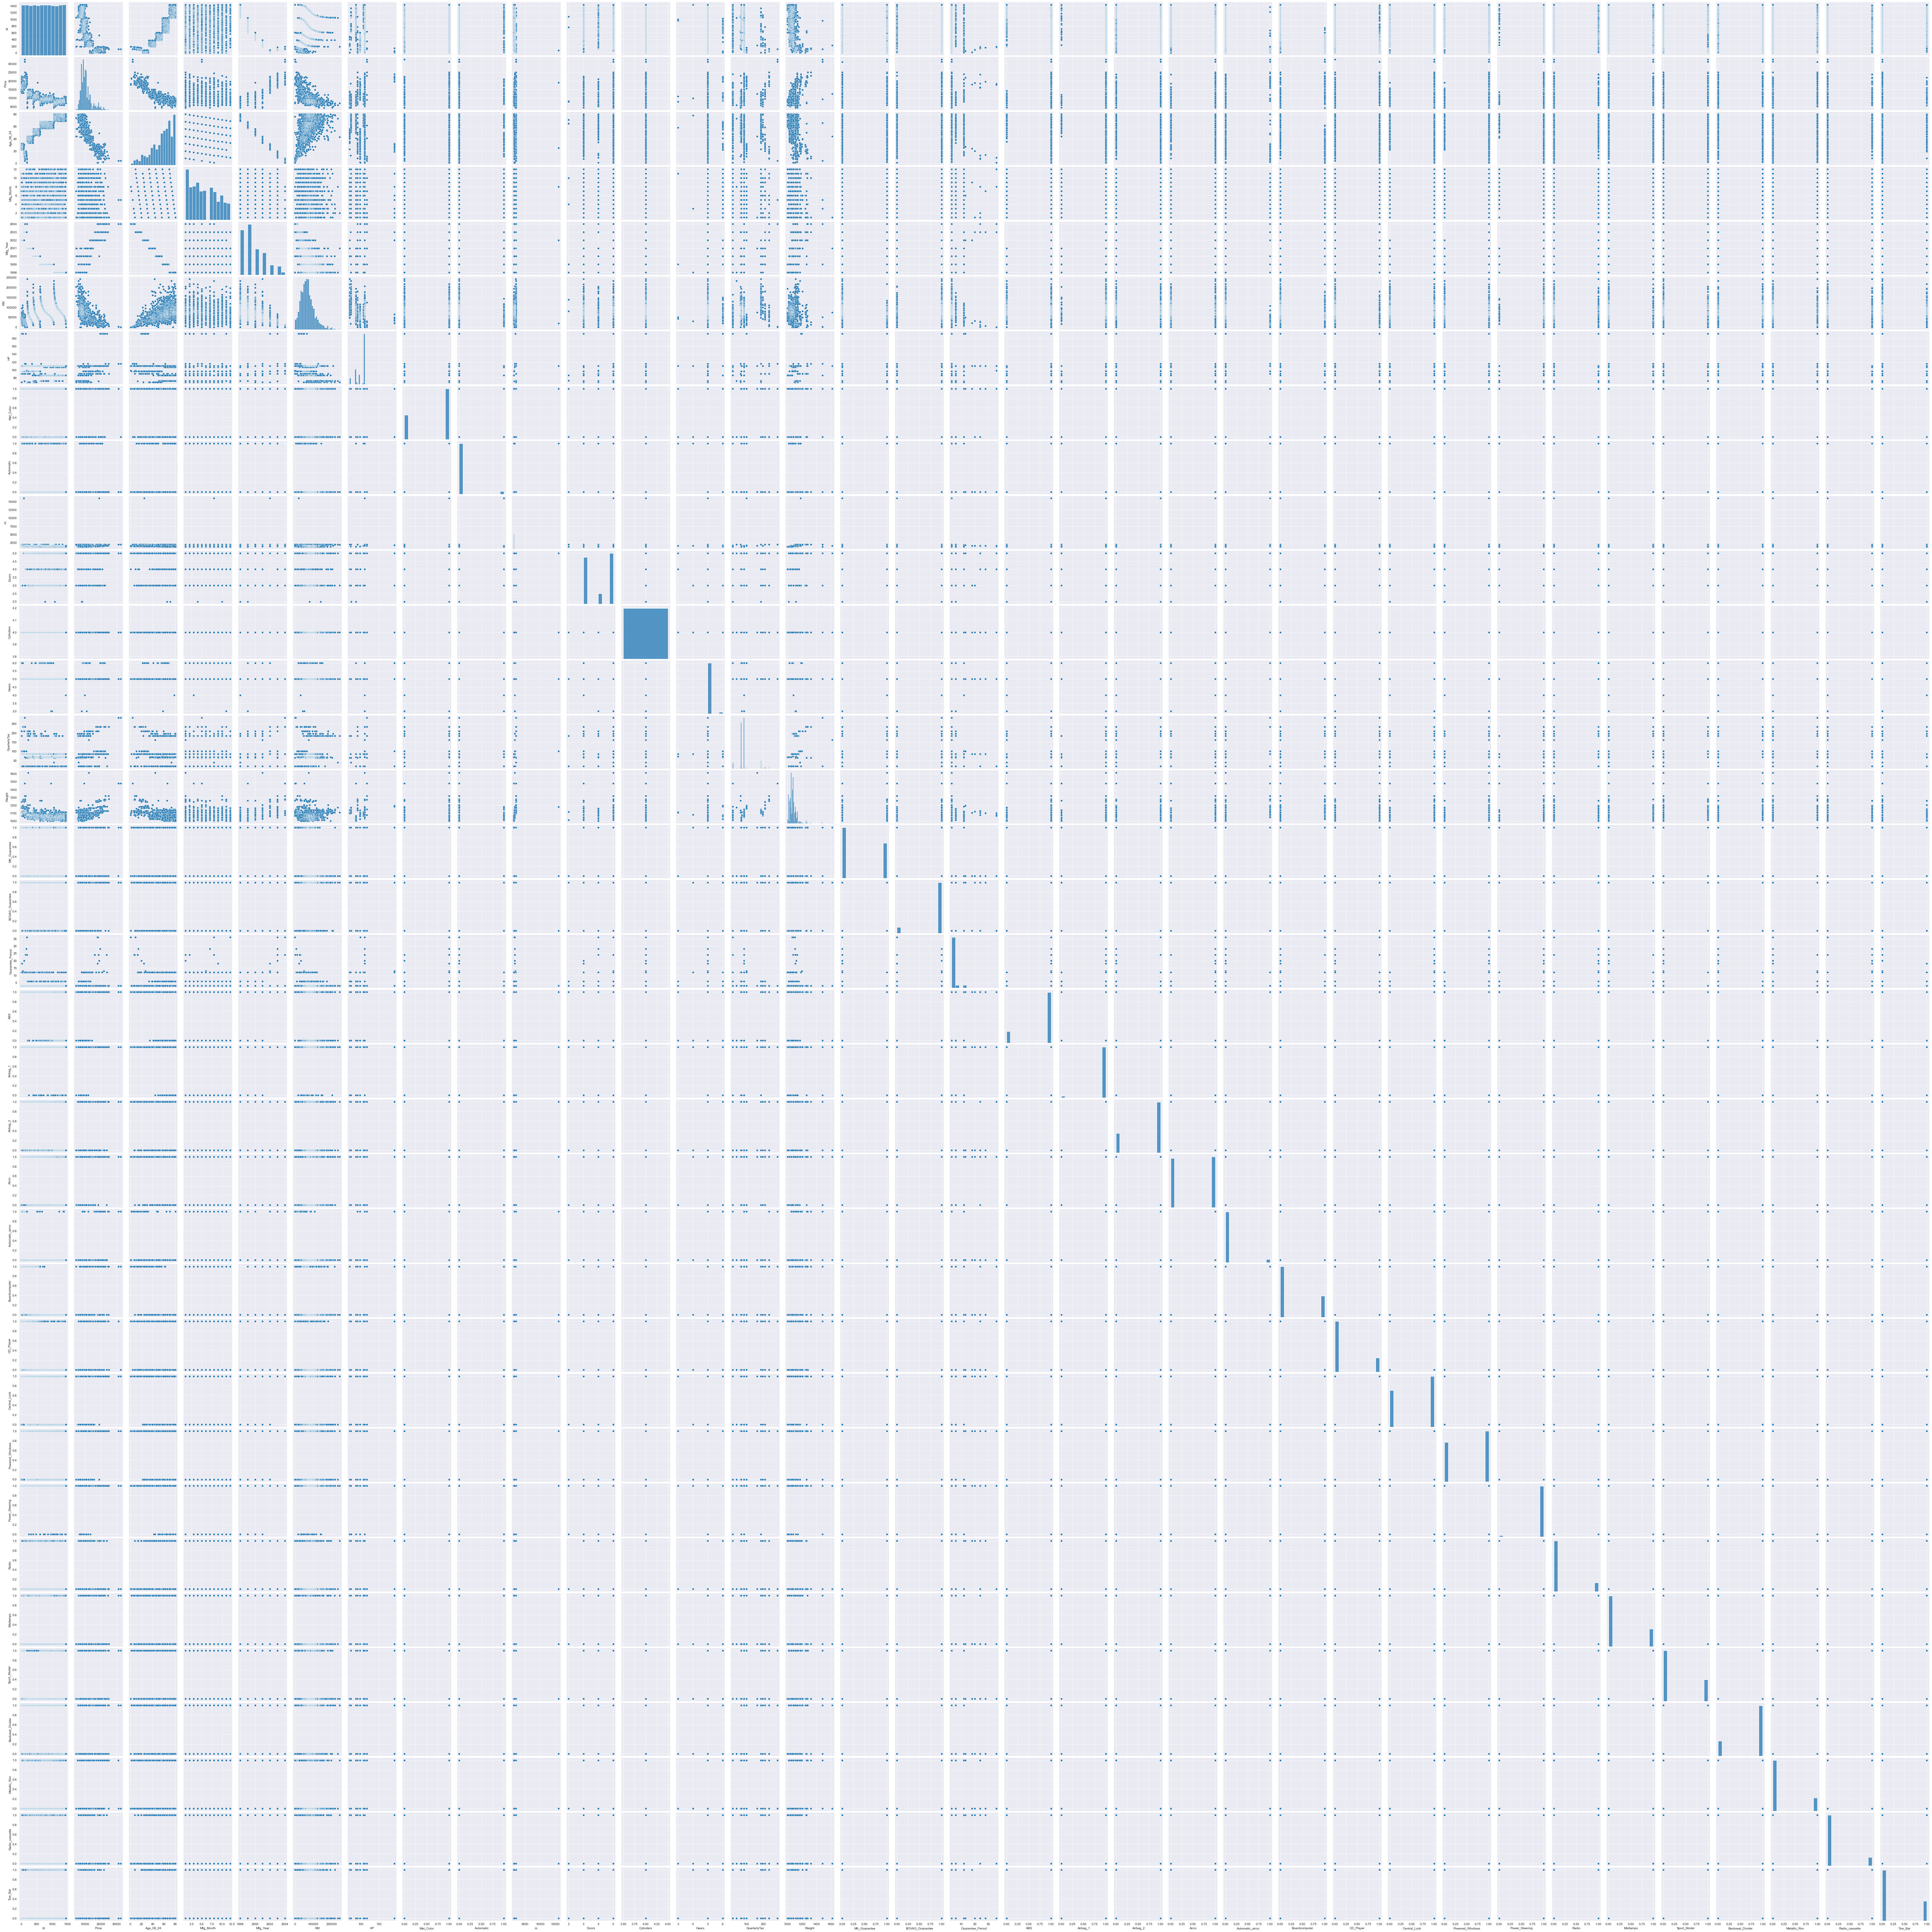

In [691]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(data)

Preaparing A Model 

In [692]:
#Build model
import statsmodels.formula.api as smf 
model = smf.ols('Price~Age_08_04+Mfg_Month+Mfg_Year+KM+HP+Met_Color+Automatic+cc+Doors+Cylinders+Gears+QuarterlyTax+Weight+Mfr_Guarantee+BOVAG_Guarantee+Guarantee_Period+ABS+Airbag_1+Airbag_2+Airco+Automatic_airco+Boardcomputer+Central_Lock+Powered_Windows+Power_Steering+Radio+Mistlamps+Sport_Model+Backseat_Divider+Metallic_Rim+Radio_cassette+Tow_Bar',data=data).fit()

In [693]:
#Coefficients
model.params

Intercept             -0.008206
Age_08_04           -119.631243
Mfg_Month            -99.994113
Mfg_Year               1.851654
KM                    -0.018490
HP                    23.523400
Met_Color              0.452770
Automatic            398.075849
cc                    -0.122986
Doors                 77.036733
Cylinders             -0.032823
Gears                203.645059
QuarterlyTax           7.719643
Weight                 9.737868
Mfr_Guarantee        241.019792
BOVAG_Guarantee      531.277081
Guarantee_Period      68.536217
ABS                 -346.062526
Airbag_1             224.964689
Airbag_2             -18.507843
Airco                194.491440
Automatic_airco     2500.733117
Boardcomputer       -244.583306
Central_Lock         -92.493118
Powered_Windows      465.475947
Power_Steering      -246.475917
Radio                619.698069
Mistlamps            -43.929855
Sport_Model          345.614929
Backseat_Divider    -103.285193
Metallic_Rim         184.498015
Radio_ca

In [694]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept          -17.004996
Age_08_04          -34.825853
Mfg_Month          -10.910537
Mfg_Year             2.701811
KM                 -17.070717
HP                   9.358234
Met_Color            0.006777
Automatic            2.953395
cc                  -1.590765
Doors                2.201807
Cylinders          -17.004996
Gears                1.152430
QuarterlyTax         6.406524
Weight               9.613799
Mfr_Guarantee        3.641276
BOVAG_Guarantee      4.670075
Guarantee_Period     5.593011
ABS                 -3.044567
Airbag_1             1.008294
Airbag_2            -0.158622
Airco                2.414263
Automatic_airco     14.702006
Boardcomputer       -2.334418
Central_Lock        -0.716634
Powered_Windows      3.617538
Power_Steering      -0.980904
Radio                0.933098
Mistlamps           -0.448080
Sport_Model          4.407333
Backseat_Divider    -0.917142
Metallic_Rim         2.163546
Radio_cassette      -1.115339
Tow_Bar             -2.588392
dtype: flo

In [695]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9054640547359203, 0.9034454936270787)

Simple linear Regression 

In [696]:
ml_v=smf.ols('Price~Age_08_04',data = data).fit()  
#t and p-Values
print(ml_v.tvalues, '\n', ml_v.pvalues)  

Intercept    138.907847
Age_08_04    -68.978267
dtype: float64 
 Intercept    0.0
Age_08_04    0.0
dtype: float64


In [697]:
ml_v=smf.ols('Price~Mfg_Month',data = data).fit()  
#t and p-Values
print(ml_v.tvalues, '\n', ml_v.pvalues)  

Intercept    58.561114
Mfg_Month    -0.686975
dtype: float64 
 Intercept    0.00000
Mfg_Month    0.49221
dtype: float64


In [698]:
ml_v=smf.ols('Price~Mfg_Year',data = data).fit()  
#t and p-Values
print(ml_v.tvalues, '\n', ml_v.pvalues)  

Intercept   -71.854478
Mfg_Year     72.040031
dtype: float64 
 Intercept    0.0
Mfg_Year     0.0
dtype: float64


In [699]:
ml_v=smf.ols('Price~KM',data = data).fit()  
#t and p-Values
print(ml_v.tvalues, '\n', ml_v.pvalues)  

Intercept    88.510378
KM          -26.267601
dtype: float64 
 Intercept     0.000000e+00
KM           1.757913e-124
dtype: float64


In [700]:
ml_v=smf.ols('Price~HP',data = data).fit()  
#t and p-Values
print(ml_v.tvalues, '\n', ml_v.pvalues)  

Intercept     4.803134
HP           12.567862
dtype: float64 
 Intercept    1.725695e-06
HP           1.926234e-34
dtype: float64


In [701]:
ml_v=smf.ols('Price~Met_Color',data = data).fit()  
#t and p-Values
print(ml_v.tvalues, '\n', ml_v.pvalues) 

Intercept    60.888569
Met_Color     4.148702
dtype: float64 
 Intercept    0.000000
Met_Color    0.000035
dtype: float64


In [702]:
ml_v=smf.ols('Price~Automatic',data = data).fit()  
#t and p-Values
print(ml_v.tvalues, '\n', ml_v.pvalues)  

Intercept    108.673925
Automatic      1.253392
dtype: float64 
 Intercept    0.000000
Automatic    0.210267
dtype: float64


In [703]:
ml_v=smf.ols('Price~cc',data = data).fit()  
#t and p-Values
print(ml_v.tvalues, '\n', ml_v.pvalues)  

Intercept    24.694090
cc            4.824822
dtype: float64 
 Intercept    1.766912e-112
cc            1.550808e-06
dtype: float64


In [704]:
ml_v=smf.ols('Price~Doors',data = data).fit()  
#t and p-Values
print(ml_v.tvalues, '\n', ml_v.pvalues)  

Intercept    19.258097
Doors         7.141657
dtype: float64 
 Intercept    1.094732e-73
Doors        1.461237e-12
dtype: float64


In [705]:
ml_v=smf.ols('Price~Cylinders',data = data).fit()  
#t and p-Values
print(ml_v.tvalues, '\n', ml_v.pvalues)  

Intercept    112.115846
Cylinders    112.115846
dtype: float64 
 Intercept    0.0
Cylinders    0.0
dtype: float64


In [706]:
ml_v=smf.ols('Price~Gears',data = data).fit()  
#t and p-Values
print(ml_v.tvalues, '\n', ml_v.pvalues)  

Intercept    1.814534
Gears        2.394401
dtype: float64 
 Intercept    0.069804
Gears        0.016775
dtype: float64


In [707]:
ml_v=smf.ols('Price~QuarterlyTax',data = data).fit()  
#t and p-Values
print(ml_v.tvalues, '\n', ml_v.pvalues)  

Intercept       41.330311
QuarterlyTax     8.507487
dtype: float64 
 Intercept       1.532168e-246
QuarterlyTax     4.407393e-17
dtype: float64


In [708]:
ml_v=smf.ols('Price~Weight',data = data).fit()  
#t and p-Values
print(ml_v.tvalues, '\n', ml_v.pvalues)  

Intercept   -20.263590
Weight       27.045855
dtype: float64 
 Intercept     1.739508e-80
Weight       1.630487e-130
dtype: float64


In [709]:
ml_v=smf.ols('Price~Mfr_Guarantee',data = data).fit()  
#t and p-Values
print(ml_v.tvalues, '\n', ml_v.pvalues)  

Intercept        82.972679
Mfr_Guarantee     7.641382
dtype: float64 
 Intercept        0.000000e+00
Mfr_Guarantee    3.910070e-14
dtype: float64


In [710]:
ml_v=smf.ols('Price~BOVAG_Guarantee',data = data).fit()  
#t and p-Values
print(ml_v.tvalues, '\n', ml_v.pvalues)  

Intercept          35.228740
BOVAG_Guarantee     1.065769
dtype: float64 
 Intercept          2.173363e-196
BOVAG_Guarantee     2.867073e-01
dtype: float64


In [711]:
ml_v=smf.ols('Price~Guarantee_Period',data = data).fit()  
#t and p-Values
print(ml_v.tvalues, '\n', ml_v.pvalues)  

Intercept           65.767597
Guarantee_Period     5.613152
dtype: float64 
 Intercept           0.000000e+00
Guarantee_Period    2.381655e-08
dtype: float64


In [712]:
ml_v=smf.ols('Price~ABS',data = data).fit()  
#t and p-Values
print(ml_v.tvalues, '\n', ml_v.pvalues)  

Intercept    39.877217
ABS          12.177566
dtype: float64 
 Intercept    1.293239e-234
ABS           1.555267e-32
dtype: float64


In [713]:
ml_v=smf.ols('Price~Airbag_1',data = data).fit()  
#t and p-Values
print(ml_v.tvalues, '\n', ml_v.pvalues)  

Intercept    15.744705
Airbag_1      3.559627
dtype: float64 
 Intercept    1.217401e-51
Airbag_1     3.835050e-04
dtype: float64


In [714]:
ml_v=smf.ols('Price~Airbag_2',data = data).fit()  
#t and p-Values
print(ml_v.tvalues, '\n', ml_v.pvalues)  

Intercept    52.645743
Airbag_2      9.734736
dtype: float64 
 Intercept    0.000000e+00
Airbag_2     9.917275e-22
dtype: float64


In [715]:
ml_v=smf.ols('Price~Airco',data = data).fit()  
#t and p-Values
print(ml_v.tvalues, '\n', ml_v.pvalues)  

Intercept    74.177058
Airco        17.997804
dtype: float64 
 Intercept    0.000000e+00
Airco        1.865330e-65
dtype: float64


In [716]:
ml_v=smf.ols('Price~Automatic_airco',data = data).fit()  
#t and p-Values
print(ml_v.tvalues, '\n', ml_v.pvalues)  

Intercept          128.085913
Automatic_airco     27.546969
dtype: float64 
 Intercept           0.000000e+00
Automatic_airco    1.985417e-134
dtype: float64


In [717]:
ml_v=smf.ols('Price~Boardcomputer',data = data).fit()  
#t and p-Values
print(ml_v.tvalues, '\n', ml_v.pvalues)  

Intercept        102.343081
Boardcomputer     28.496873
dtype: float64 
 Intercept         0.000000e+00
Boardcomputer    6.591273e-142
dtype: float64


In [718]:
ml_v=smf.ols('Price~Central_Lock',data = data).fit()  
#t and p-Values
print(ml_v.tvalues, '\n', ml_v.pvalues)  

Intercept       66.783509
Central_Lock    13.848550
dtype: float64 
 Intercept       0.000000e+00
Central_Lock    5.005938e-41
dtype: float64


In [719]:
ml_v=smf.ols('Price~Powered_Windows',data = data).fit()  
#t and p-Values
print(ml_v.tvalues, '\n', ml_v.pvalues)  

Intercept          68.560449
Powered_Windows    14.450250
dtype: float64 
 Intercept          0.000000e+00
Powered_Windows    2.748691e-44
dtype: float64


In [720]:
ml_v=smf.ols('Price~Power_Steering',data = data).fit()  
#t and p-Values
print(ml_v.tvalues, '\n', ml_v.pvalues)  

Intercept         14.353633
Power_Steering     2.439035
dtype: float64 
 Intercept         9.323737e-44
Power_Steering    1.484711e-02
dtype: float64


In [721]:
ml_v=smf.ols('Price~Radio',data = data).fit()  
#t and p-Values
print(ml_v.tvalues, '\n', ml_v.pvalues)  

Intercept    104.256080
Radio         -1.587592
dtype: float64 
 Intercept    0.000000
Radio        0.112599
dtype: float64


In [722]:
ml_v=smf.ols('Price~Mistlamps',data = data).fit()  
#t and p-Values
print(ml_v.tvalues, '\n', ml_v.pvalues)  

Intercept    94.711732
Mistlamps     8.625255
dtype: float64 
 Intercept    0.000000e+00
Mistlamps    1.666680e-17
dtype: float64


In [723]:
ml_v=smf.ols('Price~Sport_Model',data = data).fit()  
#t and p-Values
print(ml_v.tvalues, '\n', ml_v.pvalues)  

Intercept      91.598011
Sport_Model     6.300396
dtype: float64 
 Intercept      0.000000e+00
Sport_Model    3.940947e-10
dtype: float64


In [724]:
ml_v=smf.ols('Price~Backseat_Divider',data = data).fit()  
#t and p-Values
print(ml_v.tvalues, '\n', ml_v.pvalues)  

Intercept           50.585415
Backseat_Divider     3.904702
dtype: float64 
 Intercept           3.497985e-321
Backseat_Divider     9.872503e-05
dtype: float64


In [725]:
ml_v=smf.ols('Price~Metallic_Rim',data = data).fit()  
#t and p-Values
print(ml_v.tvalues, '\n', ml_v.pvalues)  

Intercept       98.670397
Metallic_Rim     4.135565
dtype: float64 
 Intercept       0.000000
Metallic_Rim    0.000037
dtype: float64


In [726]:
ml_v=smf.ols('Price~Radio_cassette',data = data).fit()  
#t and p-Values
print(ml_v.tvalues, '\n', ml_v.pvalues)  

Intercept         104.321313
Radio_cassette     -1.636637
dtype: float64 
 Intercept         0.000000
Radio_cassette    0.101926
dtype: float64


In [727]:
rsq_Age_08_04 = smf.ols('Age_08_04~KM+HP+cc+Doors+Gears+QuarterlyTax+Weight',data=data).fit().rsquared  
vif_Age_08_04 = 1/(1-rsq_Age_08_04) # 16.33

rsq_KM = smf.ols('KM~Age_08_04+HP+cc+Doors+Gears+QuarterlyTax+Weight',data=data).fit().rsquared  
vif_KM = 1/(1-rsq_KM) # 564.98

rsq_HP = smf.ols('HP~KM+Age_08_04+cc+Doors+Gears+QuarterlyTax+Weight',data=data).fit().rsquared  
vif_HP = 1/(1-rsq_HP) #  564.84

rsq_cc = smf.ols('cc~HP+KM+Age_08_04+Doors+Gears+QuarterlyTax+Weight',data=data).fit().rsquared  
vif_cc = 1/(1-rsq_cc) #  16.35

rsq_Doors = smf.ols('Doors~cc+HP+KM+Age_08_04+Gears+QuarterlyTax+Weight',data=data).fit().rsquared  
vif_Doors = 1/(1-rsq_Doors)

rsq_Gears = smf.ols('Gears~Doors+cc+HP+KM+Age_08_04+QuarterlyTax+Weight',data=data).fit().rsquared  
vif_Gears = 1/(1-rsq_Gears)

rsq_QuarterlyTax = smf.ols('QuarterlyTax~+Gears+Doors+cc+HP+KM+Age_08_04+Weight',data=data).fit().rsquared  
vif_QuarterlyTax = 1/(1-rsq_QuarterlyTax)

rsq_Weight = smf.ols('Weight~QuarterlyTax+Gears+Doors+cc+HP+KM+Age_08_04',data=data).fit().rsquared  
vif_Weight = 1/(1-rsq_Weight)

# Storing vif values in a data frame
d1 = {'Variables':['Age_08_04','KM','HP','cc','Doors','Gears','QuarterlyTax','Weight'],'VIF':[vif_Age_08_04,vif_KM,vif_HP,vif_cc,vif_Doors,vif_Gears,vif_QuarterlyTax,vif_Weight]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

Variables       VIF
0     Age_08_04  1.884620
1            KM  1.756905
2            HP  1.419422
3            cc  1.163894
4         Doors  1.156575
5         Gears  1.098723
6  QuarterlyTax  2.311431
7        Weight  2.516420

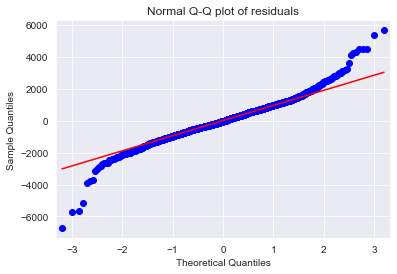

In [728]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [729]:
list(np.where(model.resid>10))

[array([   6,    7,    8,   13,   14,   15,   16,   17,   18,   19,   20,
          31,   32,   33,   34,   35,   36,   38,   39,   41,   43,   44,
          45,   46,   47,   48,   49,   50,   51,   52,   53,   56,   57,
          62,   64,   66,   68,   69,   70,   72,   73,   74,   75,   76,
          77,   78,   80,   81,   82,   84,   87,   89,   90,   91,   94,
          99,  102,  103,  104,  105,  106,  107,  108,  109,  110,  111,
         112,  113,  114,  115,  118,  119,  120,  121,  125,  126,  127,
         129,  134,  138,  139,  141,  143,  146,  147,  149,  150,  152,
         153,  154,  157,  161,  162,  163,  164,  167,  168,  171,  172,
         173,  174,  176,  177,  178,  179,  181,  182,  190,  193,  194,
         195,  196,  197,  204,  206,  210,  211,  216,  219,  223,  225,
         226,  230,  232,  233,  237,  238,  245,  247,  248,  253,  256,
         258,  259,  260,  262,  263,  267,  268,  270,  271,  272,  273,
         274,  276,  278,  279,  283, 

In [730]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

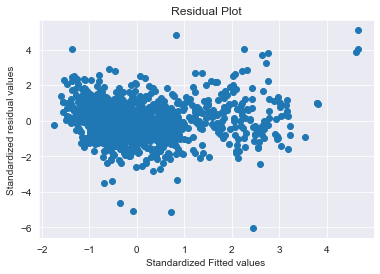

In [731]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

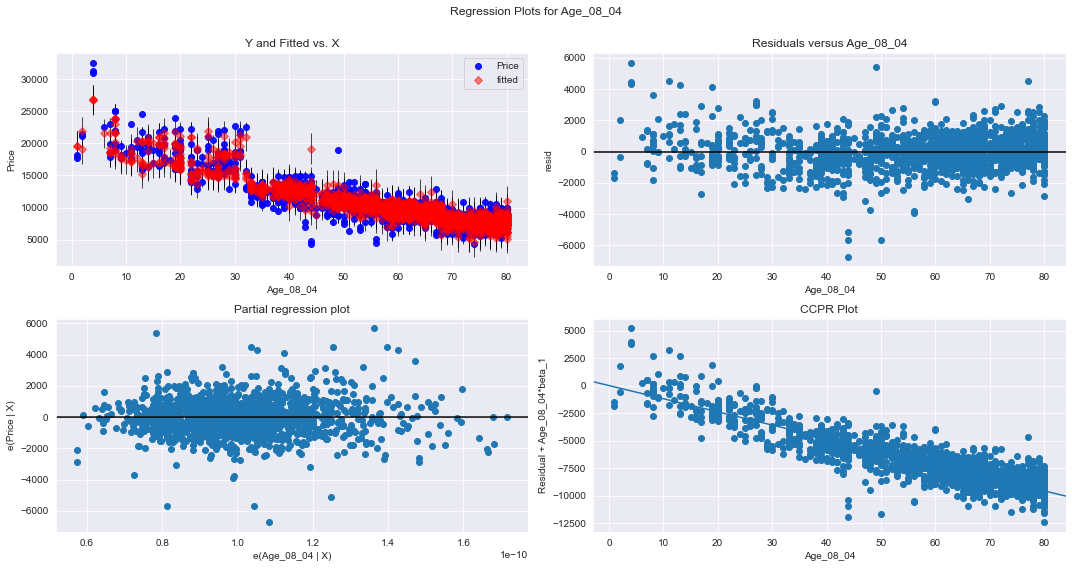

In [732]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Age_08_04", fig=fig)
plt.show()

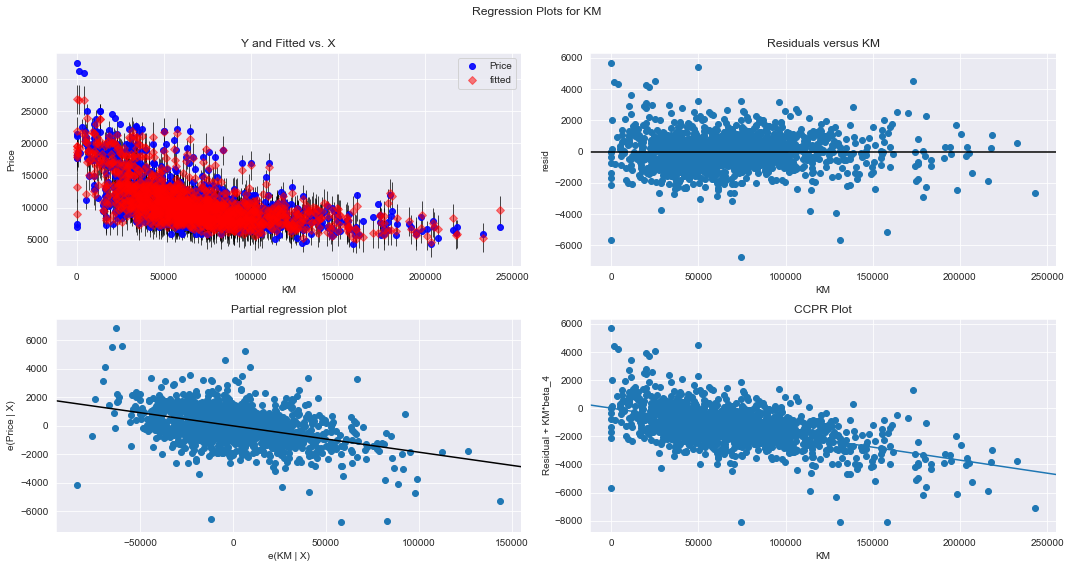

In [733]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "KM", fig=fig)
plt.show()

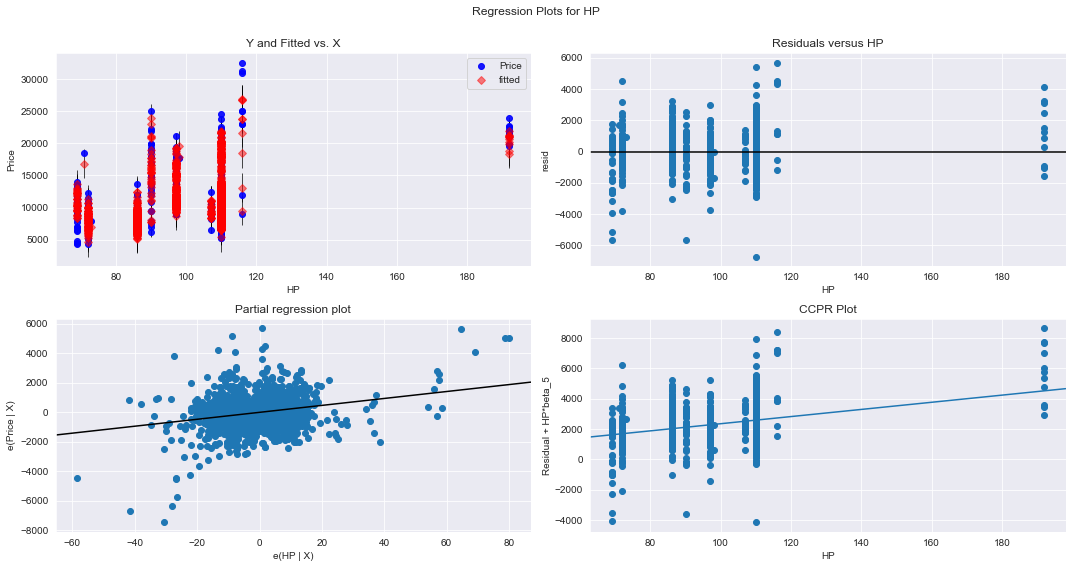

In [734]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "HP", fig=fig)
plt.show()

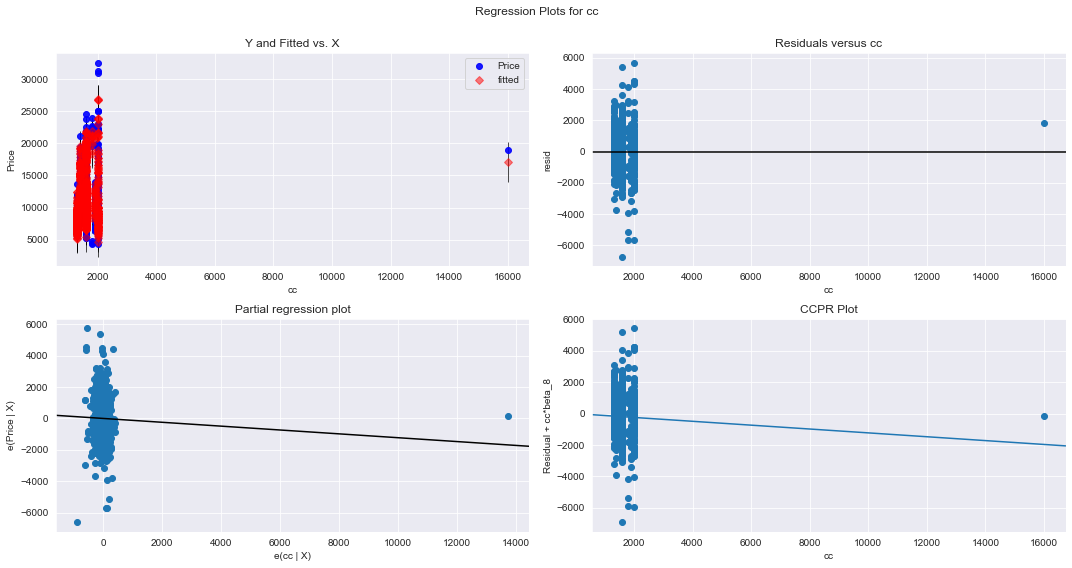

In [735]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "cc", fig=fig)
plt.show()

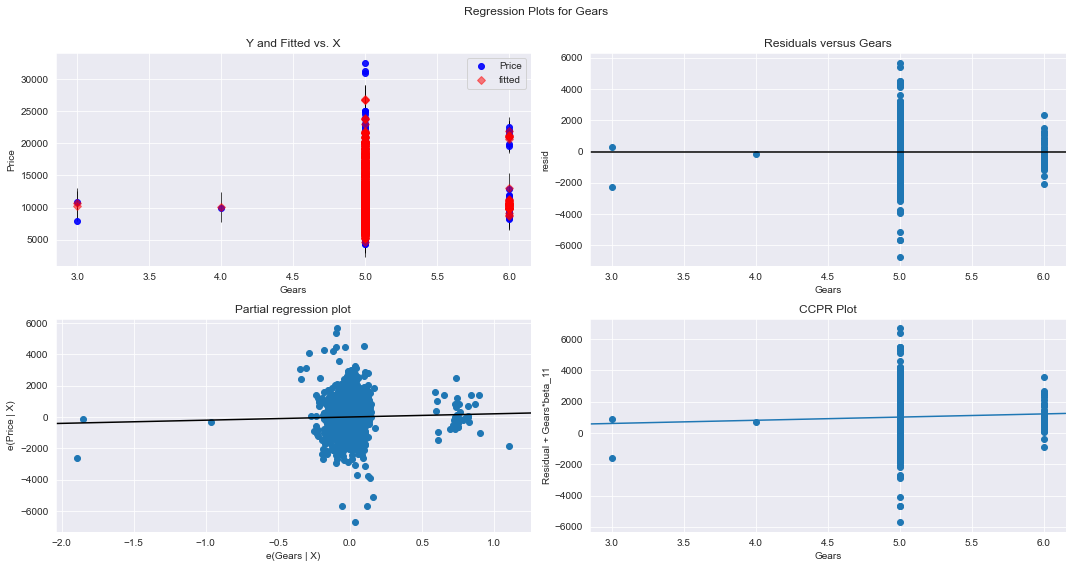

In [736]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Gears", fig=fig)
plt.show()

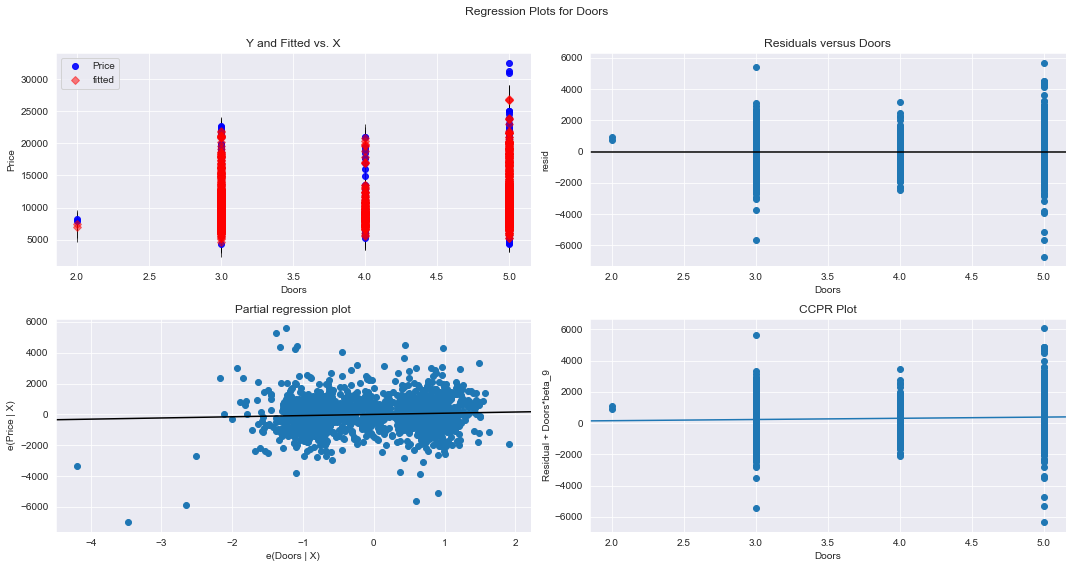

In [737]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Doors", fig=fig)
plt.show()

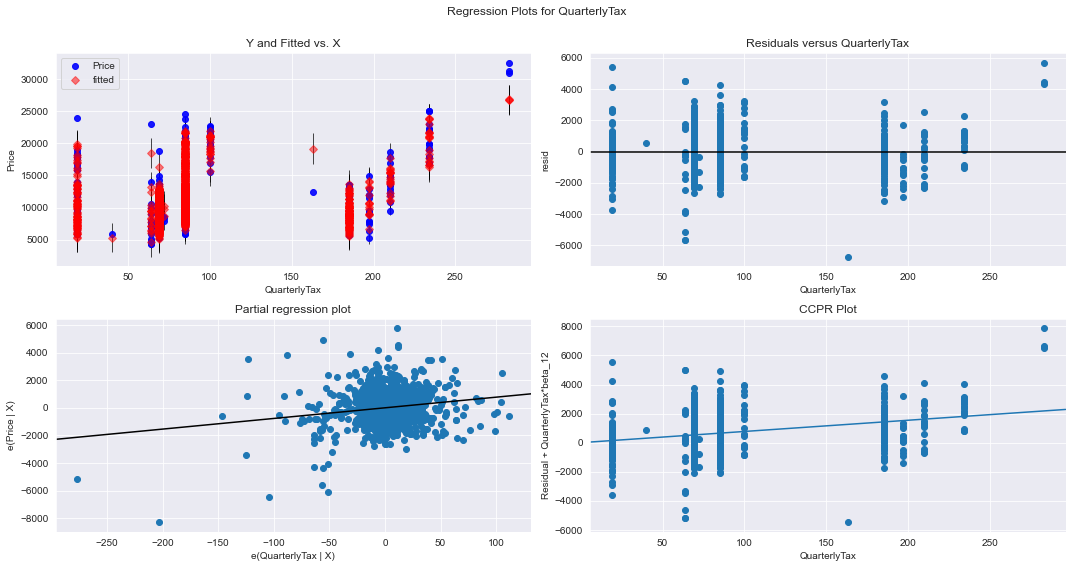

In [738]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "QuarterlyTax", fig=fig)
plt.show()

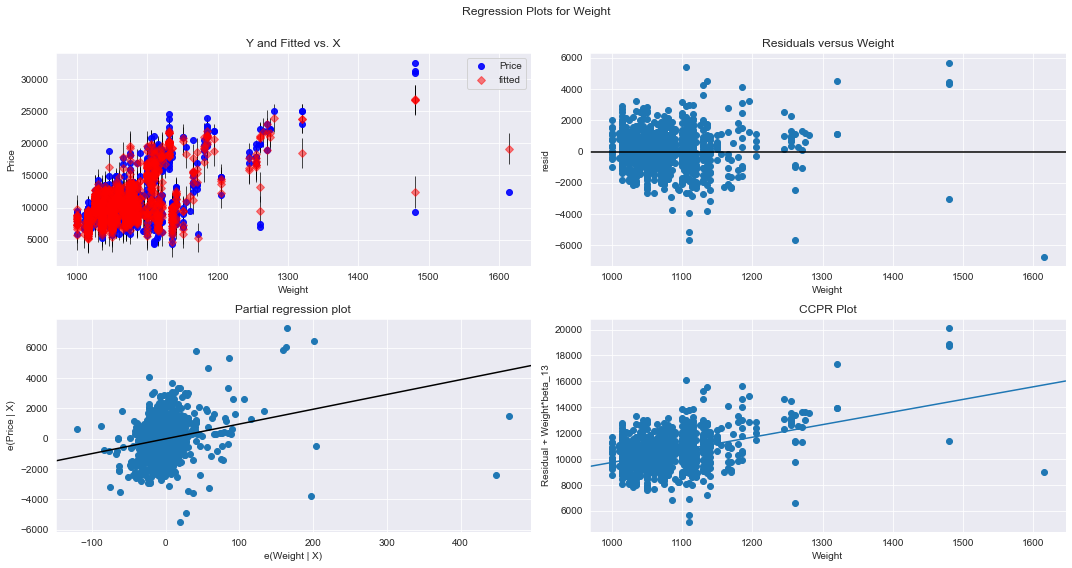

In [739]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Weight", fig=fig)
plt.show()

In [740]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

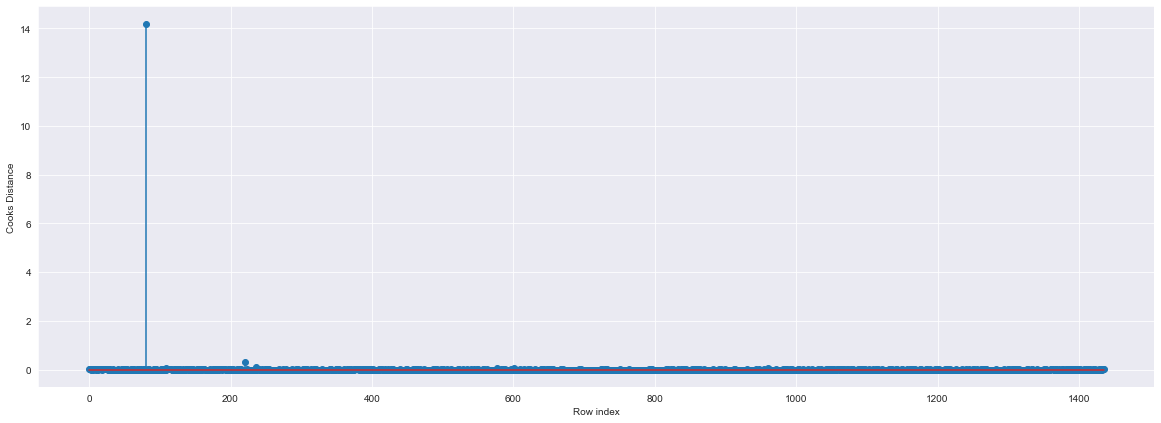

In [741]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [742]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(80, 14.200271644531302)

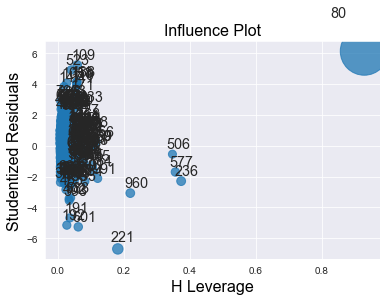

In [743]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [744]:
k = data.shape[1]
n = data.shape[0]
leverage_cutoff = 3*((k + 1)/n)

In [745]:
data[data.index.isin([80])]

Id                                Model  Price  Age_08_04  Mfg_Month  \
80  81  TOYOTA Corolla 1.6 5drs 1 4/5-Doors  18950         25          8   

    Mfg_Year     KM Fuel_Type   HP  Met_Color  ... Central_Lock  \
80      2002  20019    Petrol  110          1  ...            1   

    Powered_Windows  Power_Steering  Radio  Mistlamps  Sport_Model  \
80                1               1      0          0            0   

    Backseat_Divider  Metallic_Rim  Radio_cassette  Tow_Bar  
80                 0             0               0        0  

[1 rows x 38 columns]

In [746]:
#See the differences in HP and other variable values
data.head()

Id                                           Model  Price  Age_08_04  \
0   1   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13500         23   
1   2   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13750         23   
2   3   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13950         24   
3   4   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  14950         26   
4   5     TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  13750         30   

   Mfg_Month  Mfg_Year     KM Fuel_Type  HP  Met_Color  ... Central_Lock  \
0         10      2002  46986    Diesel  90          1  ...            1   
1         10      2002  72937    Diesel  90          1  ...            1   
2          9      2002  41711    Diesel  90          1  ...            0   
3          7      2002  48000    Diesel  90          0  ...            0   
4          3      2002  38500    Diesel  90          0  ...            1   

   Powered_Windows  Power_Steering  Radio  Mistlamps  Sport_Model  \
0                1               1      0          0            0   
1                0               1      0          0            0   
2                0               1      0          0            0   
3                0               1      0          0            0   
4                1               1      0          1            0   

   Backseat_Divider  Metallic_Rim  Radio_cassette  Tow_Bar  
0                 1             0               0        0  
1                 1             0               0        0  
2                 1             0               0        0  
3                 1             0               0        0  
4                 1             0               0        0  

[5 rows x 38 columns]

In [747]:
#load the data
data_new = pd.read_csv("C:/Users/RajabhishekAditya/Downloads/Multi regression/Toyota_Corolla.csv",encoding='unicode_escape')
data_new

Id                                              Model  Price  \
0        1      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13500   
1        2      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13750   
2        3      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13950   
3        4      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  14950   
4        5        TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  13750   
...    ...                                                ...    ...   
1431  1438         TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors   7500   
1432  1439  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...  10845   
1433  1440  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...   8500   
1434  1441  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...   7250   
1435  1442        TOYOTA Corolla 1.6 LB LINEA TERRA 4/5-Doors   6950   

      Age_08_04  Mfg_Month  Mfg_Year     KM Fuel_Type   HP  Met_Color  ...  \
0            23         10      2002  46986    Diesel   90          1  ...   
1            23         10      2002  72937    Diesel   90          1  ...   
2            24          9      2002  41711    Diesel   90          1  ...   
3            26          7      2002  48000    Diesel   90          0  ...   
4            30          3      2002  38500    Diesel   90          0  ...   
...         ...        ...       ...    ...       ...  ...        ...  ...   
1431         69         12      1998  20544    Petrol   86          1  ...   
1432         72          9      1998  19000    Petrol   86          0  ...   
1433         71         10      1998  17016    Petrol   86          0  ...   
1434         70         11      1998  16916    Petrol   86          1  ...   
1435         76          5      1998      1    Petrol  110          0  ...   

     Central_Lock  Powered_Windows  Power_Steering  Radio  Mistlamps  \
0               1                1               1      0          0   
1               1                0               1      0          0   
2               0                0               1      0          0   
3               0                0               1      0          0   
4               1                1               1      0          1   
...           ...              ...             ...    ...        ...   
1431            1                1               1      0          1   
1432            0                0               1      0          0   
1433            0                0               1      0          0   
1434            0                0               0      0          0   
1435            0                0               1      0          0   

      Sport_Model  Backseat_Divider  Metallic_Rim  Radio_cassette  Tow_Bar  
0               0                 1             0               0        0  
1               0                 1             0               0        0  
2               0                 1             0               0        0  
3               0                 1             0               0        0  
4               0                 1             0               0        0  
...           ...               ...           ...             ...      ...  
1431            1                 1             0               0        0  
1432            1                 1             0               0        0  
1433            0                 1             0               0        0  
1434            0                 1             0               0        0  
1435            0                 0             0               0        0  

[1436 rows x 38 columns]

In [748]:
#Discard the data points which are influencers and reasign the row number (reset_index())
data1=data_new.drop(data_new.index[[80]],axis=0).reset_index()

In [749]:
#Drop the original index
data1=data1.drop(['index'],axis=1)

In [750]:
data1

Id                                              Model  Price  \
0        1      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13500   
1        2      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13750   
2        3      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13950   
3        4      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  14950   
4        5        TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  13750   
...    ...                                                ...    ...   
1430  1438         TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors   7500   
1431  1439  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...  10845   
1432  1440  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...   8500   
1433  1441  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...   7250   
1434  1442        TOYOTA Corolla 1.6 LB LINEA TERRA 4/5-Doors   6950   

      Age_08_04  Mfg_Month  Mfg_Year     KM Fuel_Type   HP  Met_Color  ...  \
0            23         10      2002  46986    Diesel   90          1  ...   
1            23         10      2002  72937    Diesel   90          1  ...   
2            24          9      2002  41711    Diesel   90          1  ...   
3            26          7      2002  48000    Diesel   90          0  ...   
4            30          3      2002  38500    Diesel   90          0  ...   
...         ...        ...       ...    ...       ...  ...        ...  ...   
1430         69         12      1998  20544    Petrol   86          1  ...   
1431         72          9      1998  19000    Petrol   86          0  ...   
1432         71         10      1998  17016    Petrol   86          0  ...   
1433         70         11      1998  16916    Petrol   86          1  ...   
1434         76          5      1998      1    Petrol  110          0  ...   

     Central_Lock  Powered_Windows  Power_Steering  Radio  Mistlamps  \
0               1                1               1      0          0   
1               1                0               1      0          0   
2               0                0               1      0          0   
3               0                0               1      0          0   
4               1                1               1      0          1   
...           ...              ...             ...    ...        ...   
1430            1                1               1      0          1   
1431            0                0               1      0          0   
1432            0                0               1      0          0   
1433            0                0               0      0          0   
1434            0                0               1      0          0   

      Sport_Model  Backseat_Divider  Metallic_Rim  Radio_cassette  Tow_Bar  
0               0                 1             0               0        0  
1               0                 1             0               0        0  
2               0                 1             0               0        0  
3               0                 1             0               0        0  
4               0                 1             0               0        0  
...           ...               ...           ...             ...      ...  
1430            1                 1             0               0        0  
1431            1                 1             0               0        0  
1432            0                 1             0               0        0  
1433            0                 1             0               0        0  
1434            0                 0             0               0        0  

[1435 rows x 38 columns]

In [751]:
final_ml_V= smf.ols('Price~KM+HP+cc+Doors+QuarterlyTax+Weight',data = data1).fit()

In [752]:
(final_ml_V.rsquared,final_ml_V.aic)

(0.6657963671298611, 26031.39300887339)

In [753]:
final_ml_W= smf.ols('Price~Age_08_04+KM+HP+cc+Gears+QuarterlyTax+Weight',data = data1).fit()

In [755]:
(final_ml_W.rsquared,final_ml_W.aic)

(0.8693349475698541, 24685.765438793034)

In [756]:
model_influence_V = final_ml_V.get_influence()
(c_V, _) = model_influence_V.cooks_distance

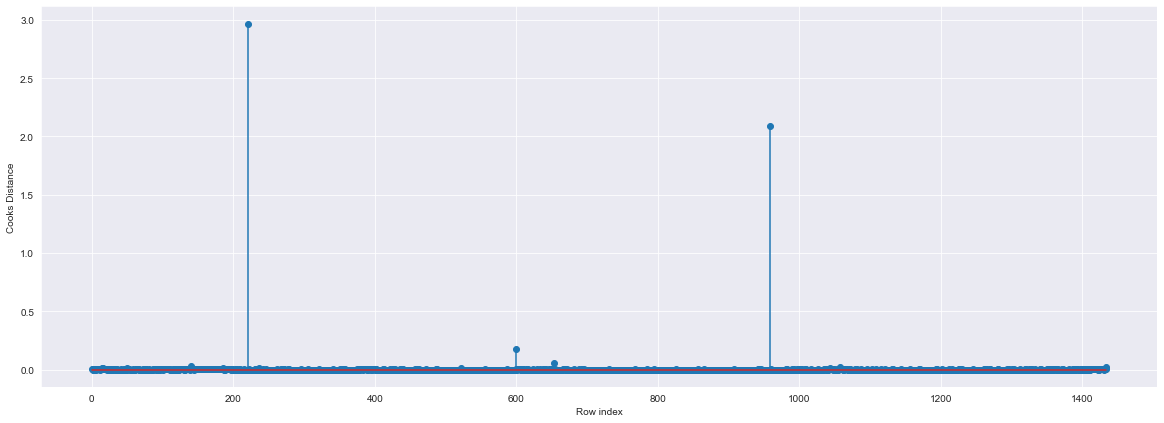

In [757]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data1)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [758]:
#index of the data points where c is more than .5
(np.argmax(c_V),np.max(c_V))

(220, 2.967613274184404)

In [759]:

#Drop 76 and 77 observations
data2=data1.drop(data1.index[[219,220]],axis=0)

In [760]:
data2

Id                                              Model  Price  \
0        1      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13500   
1        2      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13750   
2        3      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13950   
3        4      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  14950   
4        5        TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  13750   
...    ...                                                ...    ...   
1430  1438         TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors   7500   
1431  1439  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...  10845   
1432  1440  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...   8500   
1433  1441  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...   7250   
1434  1442        TOYOTA Corolla 1.6 LB LINEA TERRA 4/5-Doors   6950   

      Age_08_04  Mfg_Month  Mfg_Year     KM Fuel_Type   HP  Met_Color  ...  \
0            23         10      2002  46986    Diesel   90          1  ...   
1            23         10      2002  72937    Diesel   90          1  ...   
2            24          9      2002  41711    Diesel   90          1  ...   
3            26          7      2002  48000    Diesel   90          0  ...   
4            30          3      2002  38500    Diesel   90          0  ...   
...         ...        ...       ...    ...       ...  ...        ...  ...   
1430         69         12      1998  20544    Petrol   86          1  ...   
1431         72          9      1998  19000    Petrol   86          0  ...   
1432         71         10      1998  17016    Petrol   86          0  ...   
1433         70         11      1998  16916    Petrol   86          1  ...   
1434         76          5      1998      1    Petrol  110          0  ...   

     Central_Lock  Powered_Windows  Power_Steering  Radio  Mistlamps  \
0               1                1               1      0          0   
1               1                0               1      0          0   
2               0                0               1      0          0   
3               0                0               1      0          0   
4               1                1               1      0          1   
...           ...              ...             ...    ...        ...   
1430            1                1               1      0          1   
1431            0                0               1      0          0   
1432            0                0               1      0          0   
1433            0                0               0      0          0   
1434            0                0               1      0          0   

      Sport_Model  Backseat_Divider  Metallic_Rim  Radio_cassette  Tow_Bar  
0               0                 1             0               0        0  
1               0                 1             0               0        0  
2               0                 1             0               0        0  
3               0                 1             0               0        0  
4               0                 1             0               0        0  
...           ...               ...           ...             ...      ...  
1430            1                 1             0               0        0  
1431            1                 1             0               0        0  
1432            0                 1             0               0        0  
1433            0                 1             0               0        0  
1434            0                 0             0               0        0  

[1433 rows x 38 columns]

In [761]:
#Reset the index and re arrange the row values
data3=data2.reset_index()

In [762]:
data4=data3.drop(['index'],axis=1)

In [763]:
data4

Id                                              Model  Price  \
0        1      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13500   
1        2      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13750   
2        3      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13950   
3        4      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  14950   
4        5        TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  13750   
...    ...                                                ...    ...   
1428  1438         TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors   7500   
1429  1439  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...  10845   
1430  1440  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...   8500   
1431  1441  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...   7250   
1432  1442        TOYOTA Corolla 1.6 LB LINEA TERRA 4/5-Doors   6950   

      Age_08_04  Mfg_Month  Mfg_Year     KM Fuel_Type   HP  Met_Color  ...  \
0            23         10      2002  46986    Diesel   90          1  ...   
1            23         10      2002  72937    Diesel   90          1  ...   
2            24          9      2002  41711    Diesel   90          1  ...   
3            26          7      2002  48000    Diesel   90          0  ...   
4            30          3      2002  38500    Diesel   90          0  ...   
...         ...        ...       ...    ...       ...  ...        ...  ...   
1428         69         12      1998  20544    Petrol   86          1  ...   
1429         72          9      1998  19000    Petrol   86          0  ...   
1430         71         10      1998  17016    Petrol   86          0  ...   
1431         70         11      1998  16916    Petrol   86          1  ...   
1432         76          5      1998      1    Petrol  110          0  ...   

     Central_Lock  Powered_Windows  Power_Steering  Radio  Mistlamps  \
0               1                1               1      0          0   
1               1                0               1      0          0   
2               0                0               1      0          0   
3               0                0               1      0          0   
4               1                1               1      0          1   
...           ...              ...             ...    ...        ...   
1428            1                1               1      0          1   
1429            0                0               1      0          0   
1430            0                0               1      0          0   
1431            0                0               0      0          0   
1432            0                0               1      0          0   

      Sport_Model  Backseat_Divider  Metallic_Rim  Radio_cassette  Tow_Bar  
0               0                 1             0               0        0  
1               0                 1             0               0        0  
2               0                 1             0               0        0  
3               0                 1             0               0        0  
4               0                 1             0               0        0  
...           ...               ...           ...             ...      ...  
1428            1                 1             0               0        0  
1429            1                 1             0               0        0  
1430            0                 1             0               0        0  
1431            0                 1             0               0        0  
1432            0                 0             0               0        0  

[1433 rows x 38 columns]

In [764]:
#Build the model on the new data
final_ml_V= smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+QuarterlyTax+Weight',data = data4).fit()

In [765]:
#Again check for influencers
model_influence_V = final_ml_V.get_influence()
(c_V, _) = model_influence_V.cooks_distance

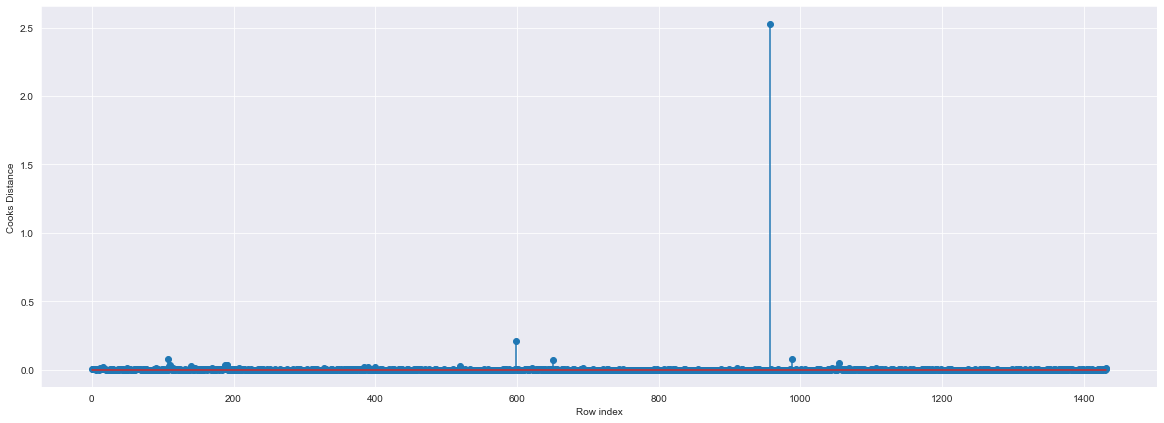

In [766]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data4)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [767]:
#index of the data points where c is more than .5
(np.argmax(c_V),np.max(c_V))

(957, 2.529459456922368)

In [768]:
#Check the accuracy of the mode
final_ml_V= smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+QuarterlyTax+Weight',data = data4).fit()

In [769]:
(final_ml_V.rsquared,final_ml_V.aic) # since the value is <1 then we can finalized the model because the best fit model value must be less than 1

(0.8778432701682173, 24558.55242139073)

Predicting for new data 

In [770]:
#New data for prediction
new_data=pd.DataFrame({'Age_08_04':40,"KM":95,"HP":102,"cc":35,"Doors":80,"Gears":55,"QuarterlyTax":100,"Weight":80},index=[1])

In [771]:
final_ml_V.predict(new_data)

1    13248.501791
dtype: float64

In [772]:
final_ml_V.predict(data_new.iloc[0:5,])

0    16464.249779
1    16016.118355
2    16438.739186
3    16096.935948
4    15919.791747
dtype: float64

In [773]:
final_ml_V.predict(data_new.iloc[0:7,])

0    16464.249779
1    16016.118355
2    16438.739186
3    16096.935948
4    15919.791747
5    15298.050992
6    17178.801396
dtype: float64

In [774]:
pred_y = final_ml_V.predict(data_new)

In [775]:
pred_y

0       16464.249779
1       16016.118355
2       16438.739186
3       16096.935948
4       15919.791747
            ...     
1431     9014.358945
1432     8440.795117
1433     8591.656795
1434     8709.984867
1435    10235.016518
Length: 1436, dtype: float64

# Prepare a prediction model for profit of 50_startups data.Do transformations for getting better predictions of profit andmake a table containing R^2 value for each prepared model.



In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [107]:
#Read the data
data = pd.read_csv("C:/Users/RajabhishekAditya/Downloads/Multi regression/50_Startups.csv")
data

R&D Spend  Administration  Marketing Spend       State     Profit
0   165349.20       136897.80        471784.10    New York  192261.83
1   162597.70       151377.59        443898.53  California  191792.06
2   153441.51       101145.55        407934.54     Florida  191050.39
3   144372.41       118671.85        383199.62    New York  182901.99
4   142107.34        91391.77        366168.42     Florida  166187.94
5   131876.90        99814.71        362861.36    New York  156991.12
6   134615.46       147198.87        127716.82  California  156122.51
7   130298.13       145530.06        323876.68     Florida  155752.60
8   120542.52       148718.95        311613.29    New York  152211.77
9   123334.88       108679.17        304981.62  California  149759.96
10  101913.08       110594.11        229160.95     Florida  146121.95
11  100671.96        91790.61        249744.55  California  144259.40
12   93863.75       127320.38        249839.44     Florida  141585.52
13   91992.39       135495.07        252664.93  California  134307.35
14  119943.24       156547.42        256512.92     Florida  132602.65
15  114523.61       122616.84        261776.23    New York  129917.04
16   78013.11       121597.55        264346.06  California  126992.93
17   94657.16       145077.58        282574.31    New York  125370.37
18   91749.16       114175.79        294919.57     Florida  124266.90
19   86419.70       153514.11             0.00    New York  122776.86
20   76253.86       113867.30        298664.47  California  118474.03
21   78389.47       153773.43        299737.29    New York  111313.02
22   73994.56       122782.75        303319.26     Florida  110352.25
23   67532.53       105751.03        304768.73     Florida  108733.99
24   77044.01        99281.34        140574.81    New York  108552.04
25   64664.71       139553.16        137962.62  California  107404.34
26   75328.87       144135.98        134050.07     Florida  105733.54
27   72107.60       127864.55        353183.81    New York  105008.31
28   66051.52       182645.56        118148.20     Florida  103282.38
29   65605.48       153032.06        107138.38    New York  101004.64
30   61994.48       115641.28         91131.24     Florida   99937.59
31   61136.38       152701.92         88218.23    New York   97483.56
32   63408.86       129219.61         46085.25  California   97427.84
33   55493.95       103057.49        214634.81     Florida   96778.92
34   46426.07       157693.92        210797.67  California   96712.80
35   46014.02        85047.44        205517.64    New York   96479.51
36   28663.76       127056.21        201126.82     Florida   90708.19
37   44069.95        51283.14        197029.42  California   89949.14
38   20229.59        65947.93        185265.10    New York   81229.06
39   38558.51        82982.09        174999.30  California   81005.76
40   28754.33       118546.05        172795.67  California   78239.91
41   27892.92        84710.77        164470.71     Florida   77798.83
42   23640.93        96189.63        148001.11  California   71498.49
43   15505.73       127382.30         35534.17    New York   69758.98
44   22177.74       154806.14         28334.72  California   65200.33
45    1000.23       124153.04          1903.93    New York   64926.08
46    1315.46       115816.21        297114.46     Florida   49490.75
47       0.00       135426.92             0.00  California   42559.73
48     542.05        51743.15             0.00    New York   35673.41
49       0.00       116983.80         45173.06  California   14681.40

In [108]:
#Shape of the data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [109]:
data1 = pd.get_dummies(data['State'])
data1 = pd.concat([data, data1], axis=1)
data1

R&D Spend  Administration  Marketing Spend       State     Profit  \
0   165349.20       136897.80        471784.10    New York  192261.83   
1   162597.70       151377.59        443898.53  California  191792.06   
2   153441.51       101145.55        407934.54     Florida  191050.39   
3   144372.41       118671.85        383199.62    New York  182901.99   
4   142107.34        91391.77        366168.42     Florida  166187.94   
5   131876.90        99814.71        362861.36    New York  156991.12   
6   134615.46       147198.87        127716.82  California  156122.51   
7   130298.13       145530.06        323876.68     Florida  155752.60   
8   120542.52       148718.95        311613.29    New York  152211.77   
9   123334.88       108679.17        304981.62  California  149759.96   
10  101913.08       110594.11        229160.95     Florida  146121.95   
11  100671.96        91790.61        249744.55  California  144259.40   
12   93863.75       127320.38        249839.44     Florida  141585.52   
13   91992.39       135495.07        252664.93  California  134307.35   
14  119943.24       156547.42        256512.92     Florida  132602.65   
15  114523.61       122616.84        261776.23    New York  129917.04   
16   78013.11       121597.55        264346.06  California  126992.93   
17   94657.16       145077.58        282574.31    New York  125370.37   
18   91749.16       114175.79        294919.57     Florida  124266.90   
19   86419.70       153514.11             0.00    New York  122776.86   
20   76253.86       113867.30        298664.47  California  118474.03   
21   78389.47       153773.43        299737.29    New York  111313.02   
22   73994.56       122782.75        303319.26     Florida  110352.25   
23   67532.53       105751.03        304768.73     Florida  108733.99   
24   77044.01        99281.34        140574.81    New York  108552.04   
25   64664.71       139553.16        137962.62  California  107404.34   
26   75328.87       144135.98        134050.07     Florida  105733.54   
27   72107.60       127864.55        353183.81    New York  105008.31   
28   66051.52       182645.56        118148.20     Florida  103282.38   
29   65605.48       153032.06        107138.38    New York  101004.64   
30   61994.48       115641.28         91131.24     Florida   99937.59   
31   61136.38       152701.92         88218.23    New York   97483.56   
32   63408.86       129219.61         46085.25  California   97427.84   
33   55493.95       103057.49        214634.81     Florida   96778.92   
34   46426.07       157693.92        210797.67  California   96712.80   
35   46014.02        85047.44        205517.64    New York   96479.51   
36   28663.76       127056.21        201126.82     Florida   90708.19   
37   44069.95        51283.14        197029.42  California   89949.14   
38   20229.59        65947.93        185265.10    New York   81229.06   
39   38558.51        82982.09        174999.30  California   81005.76   
40   28754.33       118546.05        172795.67  California   78239.91   
41   27892.92        84710.77        164470.71     Florida   77798.83   
42   23640.93        96189.63        148001.11  California   71498.49   
43   15505.73       127382.30         35534.17    New York   69758.98   
44   22177.74       154806.14         28334.72  California   65200.33   
45    1000.23       124153.04          1903.93    New York   64926.08   
46    1315.46       115816.21        297114.46     Florida   49490.75   
47       0.00       135426.92             0.00  California   42559.73   
48     542.05        51743.15             0.00    New York   35673.41   
49       0.00       116983.80         45173.06  California   14681.40   

    California  Florida  New York  
0            0        0         1  
1            1        0         0  
2            0        1         0  
3            0        0         1  
4            0        1         0  
5            0        0         1  
6            1        0     

In [110]:
data2=data1.drop(['State'],axis=1)
data2

R&D Spend  Administration  Marketing Spend     Profit  California  \
0   165349.20       136897.80        471784.10  192261.83           0   
1   162597.70       151377.59        443898.53  191792.06           1   
2   153441.51       101145.55        407934.54  191050.39           0   
3   144372.41       118671.85        383199.62  182901.99           0   
4   142107.34        91391.77        366168.42  166187.94           0   
5   131876.90        99814.71        362861.36  156991.12           0   
6   134615.46       147198.87        127716.82  156122.51           1   
7   130298.13       145530.06        323876.68  155752.60           0   
8   120542.52       148718.95        311613.29  152211.77           0   
9   123334.88       108679.17        304981.62  149759.96           1   
10  101913.08       110594.11        229160.95  146121.95           0   
11  100671.96        91790.61        249744.55  144259.40           1   
12   93863.75       127320.38        249839.44  141585.52           0   
13   91992.39       135495.07        252664.93  134307.35           1   
14  119943.24       156547.42        256512.92  132602.65           0   
15  114523.61       122616.84        261776.23  129917.04           0   
16   78013.11       121597.55        264346.06  126992.93           1   
17   94657.16       145077.58        282574.31  125370.37           0   
18   91749.16       114175.79        294919.57  124266.90           0   
19   86419.70       153514.11             0.00  122776.86           0   
20   76253.86       113867.30        298664.47  118474.03           1   
21   78389.47       153773.43        299737.29  111313.02           0   
22   73994.56       122782.75        303319.26  110352.25           0   
23   67532.53       105751.03        304768.73  108733.99           0   
24   77044.01        99281.34        140574.81  108552.04           0   
25   64664.71       139553.16        137962.62  107404.34           1   
26   75328.87       144135.98        134050.07  105733.54           0   
27   72107.60       127864.55        353183.81  105008.31           0   
28   66051.52       182645.56        118148.20  103282.38           0   
29   65605.48       153032.06        107138.38  101004.64           0   
30   61994.48       115641.28         91131.24   99937.59           0   
31   61136.38       152701.92         88218.23   97483.56           0   
32   63408.86       129219.61         46085.25   97427.84           1   
33   55493.95       103057.49        214634.81   96778.92           0   
34   46426.07       157693.92        210797.67   96712.80           1   
35   46014.02        85047.44        205517.64   96479.51           0   
36   28663.76       127056.21        201126.82   90708.19           0   
37   44069.95        51283.14        197029.42   89949.14           1   
38   20229.59        65947.93        185265.10   81229.06           0   
39   38558.51        82982.09        174999.30   81005.76           1   
40   28754.33       118546.05        172795.67   78239.91           1   
41   27892.92        84710.77        164470.71   77798.83           0   
42   23640.93        96189.63        148001.11   71498.49           1   
43   15505.73       127382.30         35534.17   69758.98           0   
44   22177.74       154806.14         28334.72   65200.33           1   
45    1000.23       124153.04          1903.93   64926.08           0   
46    1315.46       115816.21        297114.46   49490.75           0   
47       0.00       135426.92             0.00   42559.73           1   
48     542.05        51743.15             0.00   35673.41           0   
49       0.00       116983.80         45173.06   14681.40           1   

    Florida  New York  
0         0         1  
1         0         0  
2         1         0  
3         0         1  
4         1         0  
5         0         1  
6         0         0  
7         1         0  
8         0         1  
9         0         0  
10        1     

In [111]:
data2.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
Profit             0
California         0
Florida            0
New York           0
dtype: int64

In [112]:
data2.corr()

R&D Spend  Administration  Marketing Spend    Profit  \
R&D Spend         1.000000        0.241955         0.724248  0.972900   
Administration    0.241955        1.000000        -0.032154  0.200717   
Marketing Spend   0.724248       -0.032154         1.000000  0.747766   
Profit            0.972900        0.200717         0.747766  1.000000   
California       -0.143165       -0.015478        -0.168875 -0.145837   
Florida           0.105711        0.010493         0.205685  0.116244   
New York          0.039068        0.005145        -0.033670  0.031368   

                 California   Florida  New York  
R&D Spend         -0.143165  0.105711  0.039068  
Administration    -0.015478  0.010493  0.005145  
Marketing Spend   -0.168875  0.205685 -0.033670  
Profit            -0.145837  0.116244  0.031368  
California         1.000000 -0.492366 -0.515152  
Florida           -0.492366  1.000000 -0.492366  
New York          -0.515152 -0.492366  1.000000

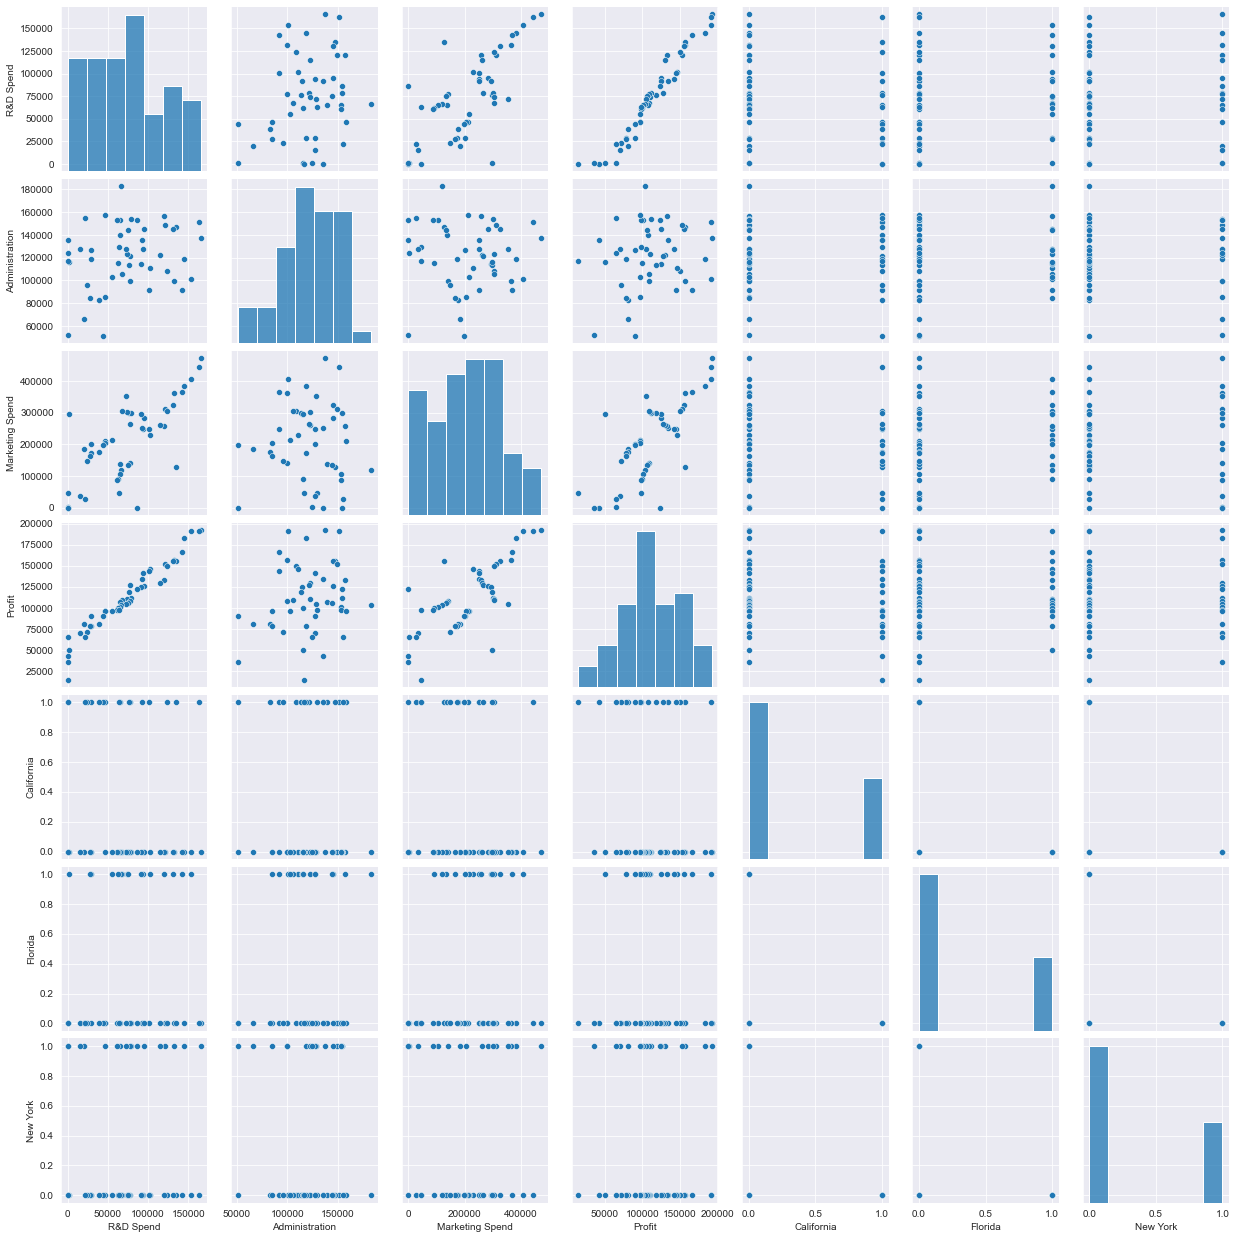

In [113]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(data2)

In [114]:
data2 = data2.rename({'R&D Spend': 'RND'},axis=1)
data2.head()

RND  Administration  Marketing Spend     Profit  California  Florida  \
0  165349.20       136897.80        471784.10  192261.83           0        0   
1  162597.70       151377.59        443898.53  191792.06           1        0   
2  153441.51       101145.55        407934.54  191050.39           0        1   
3  144372.41       118671.85        383199.62  182901.99           0        0   
4  142107.34        91391.77        366168.42  166187.94           0        1   

   New York  
0         1  
1         0  
2         0  
3         1  
4         0

In [115]:
data2 = data2.rename({'Marketing Spend': 'markspend'},axis=1)
data2.head()

RND  Administration  markspend     Profit  California  Florida  \
0  165349.20       136897.80  471784.10  192261.83           0        0   
1  162597.70       151377.59  443898.53  191792.06           1        0   
2  153441.51       101145.55  407934.54  191050.39           0        1   
3  144372.41       118671.85  383199.62  182901.99           0        0   
4  142107.34        91391.77  366168.42  166187.94           0        1   

   New York  
0         1  
1         0  
2         0  
3         1  
4         0

In [116]:
#Build model
import statsmodels.formula.api as smf 
model = smf.ols('Profit~RND',data=data2).fit()

In [117]:
model.params

Intercept    49032.899141
RND              0.854291
dtype: float64

In [118]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept    19.320288
RND          29.151139
dtype: float64 
 Intercept    2.782697e-24
RND          3.500322e-32
dtype: float64


In [119]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9465353160804392, 0.9454214684987816)

In [120]:
#Build model
import statsmodels.formula.api as smf 
model = smf.ols('Profit~Administration',data=data2).fit()

In [121]:
model.params

Intercept         76974.471305
Administration        0.288749
dtype: float64

In [122]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept         3.040044
Administration    1.419493
dtype: float64 
 Intercept         0.003824
Administration    0.162217
dtype: float64


In [123]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.04028714077757245, 0.020293122877105274)

In [124]:
#Build model
import statsmodels.formula.api as smf 
model = smf.ols('Profit~markspend',data=data2).fit()

In [125]:
model.params

Intercept    60003.548816
markspend        0.246459
dtype: float64

In [126]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept    7.808356
markspend    7.802657
dtype: float64 
 Intercept    4.294735e-10
markspend    4.381073e-10
dtype: float64


In [127]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.5591535746115515, 0.5499692740826254)

In [128]:
ml_v=smf.ols('Profit~RND',data = data2).fit()  
#t and p-Values
print(ml_v.tvalues, '\n', ml_v.pvalues)  

Intercept    19.320288
RND          29.151139
dtype: float64 
 Intercept    2.782697e-24
RND          3.500322e-32
dtype: float64


In [129]:
ml_v=smf.ols('Profit~Administration',data = data2).fit()  
#t and p-Values
print(ml_v.tvalues, '\n', ml_v.pvalues)  

Intercept         3.040044
Administration    1.419493
dtype: float64 
 Intercept         0.003824
Administration    0.162217
dtype: float64


In [130]:
ml_v=smf.ols('Profit~markspend',data = data2).fit()  
#t and p-Values
print(ml_v.tvalues, '\n', ml_v.pvalues)  

Intercept    7.808356
markspend    7.802657
dtype: float64 
 Intercept    4.294735e-10
markspend    4.381073e-10
dtype: float64


In [131]:
#Build model
import statsmodels.formula.api as smf 
model = smf.ols('Profit~RND+Administration+markspend',data=data2).fit()

In [132]:
model.params

Intercept         50122.192990
RND                   0.805715
Administration       -0.026816
markspend             0.027228
dtype: float64

In [133]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept          7.626218
RND               17.846374
Administration    -0.525507
markspend          1.655077
dtype: float64 
 Intercept         1.057379e-09
RND               2.634968e-22
Administration    6.017551e-01
markspend         1.047168e-01
dtype: float64


In [134]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

In [135]:
rsq_RND = smf.ols('RND~Administration+markspend',data=data2).fit().rsquared  
vif_RND = 1/(1-rsq_RND) # 16.33

rsq_Administration = smf.ols('Administration~RND+markspend',data=data2).fit().rsquared  
vif_Administration = 1/(1-rsq_Administration) # 564.98

rsq_markspend = smf.ols('markspend~Administration+RND',data=data2).fit().rsquared  
vif_markspend = 1/(1-rsq_markspend) #  564.84



# Storing vif values in a data frame
d1 = {'Variables':['RND','Administration','markspend'],'VIF':[vif_RND,vif_Administration,vif_markspend]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

Variables       VIF
0             RND  2.468903
1  Administration  1.175091
2       markspend  2.326773

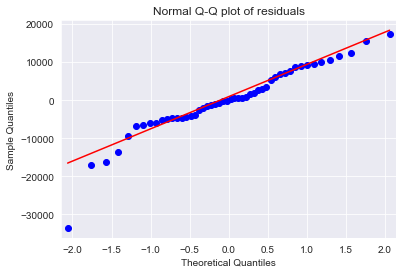

In [136]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [137]:
list(np.where(model.resid>16000))

[array([45], dtype=int64)]

In [138]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

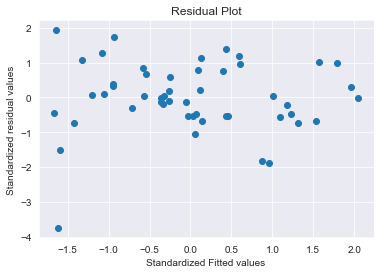

In [139]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

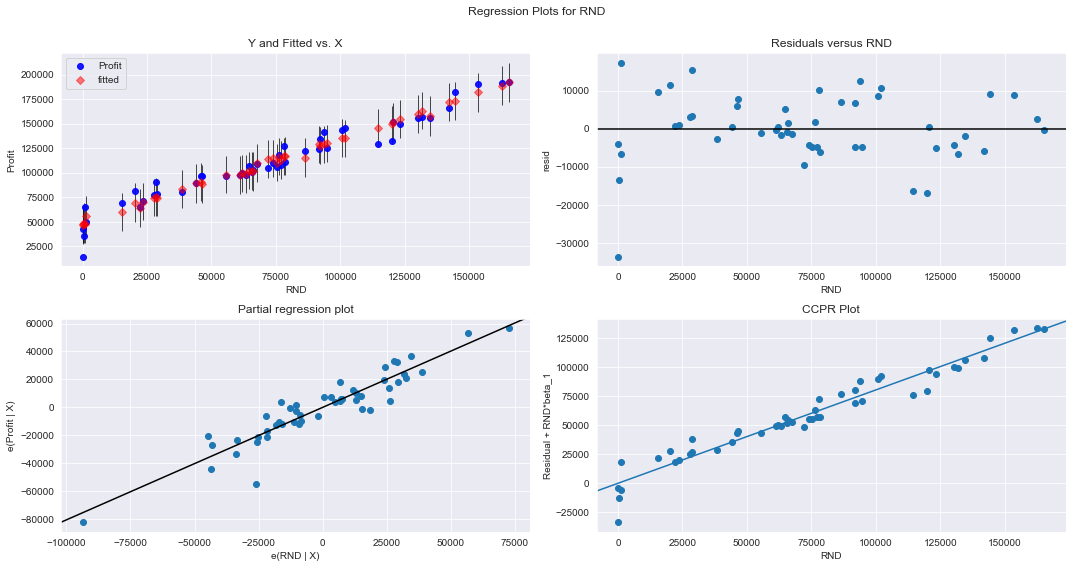

In [140]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "RND", fig=fig)
plt.show()

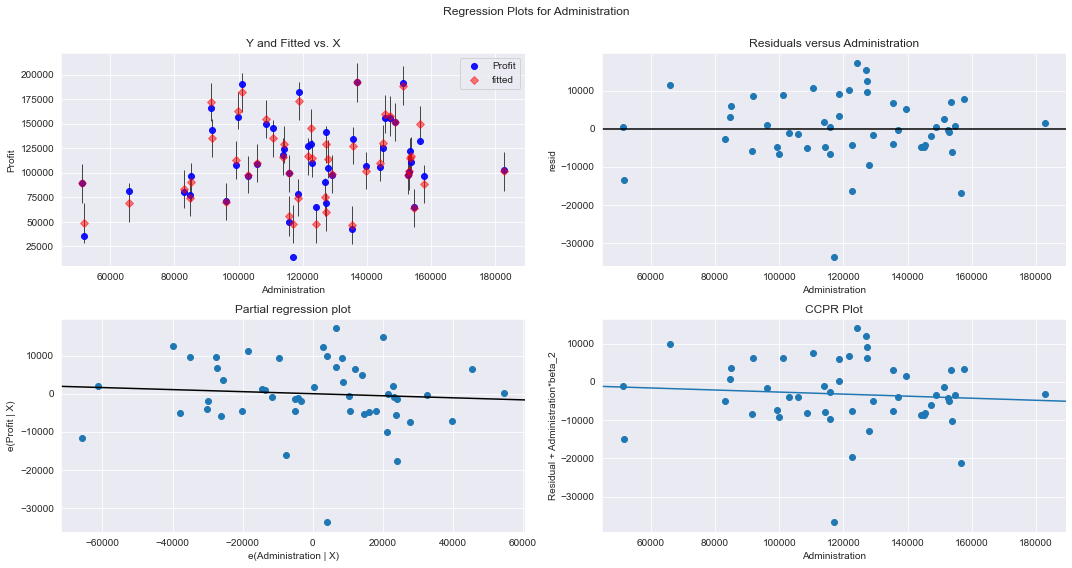

In [141]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Administration", fig=fig)
plt.show()

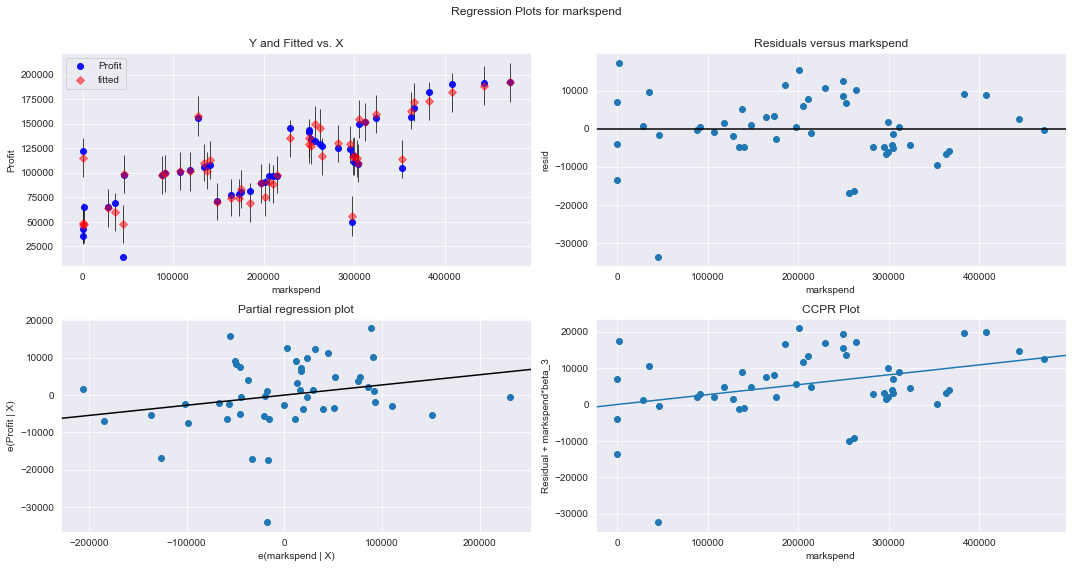

In [142]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "markspend", fig=fig)
plt.show()

In [143]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

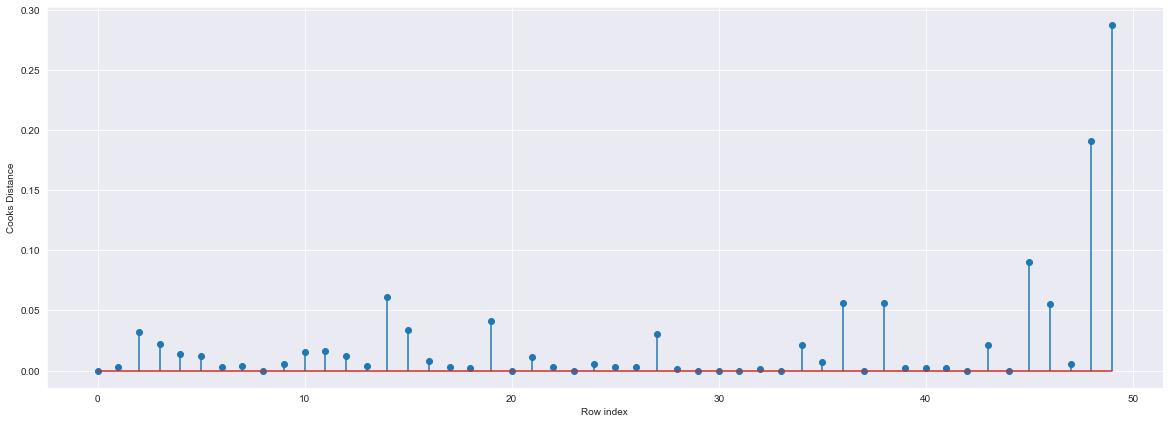

In [144]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data2)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [145]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(49, 0.28808229275432634)

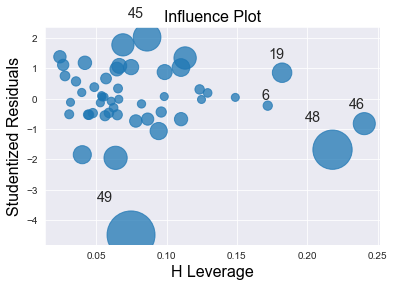

In [146]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [147]:
k = data2.shape[1]
n = data2.shape[0]
leverage_cutoff = 3*((k + 1)/n)

In [148]:
data2[data2.index.isin([45,49])]

RND  Administration  markspend    Profit  California  Florida  \
45  1000.23       124153.04    1903.93  64926.08           0        0   
49     0.00       116983.80   45173.06  14681.40           1        0   

    New York  
45         1  
49         0

In [149]:
#See the differences in HP and other variable values
data2.head()

RND  Administration  markspend     Profit  California  Florida  \
0  165349.20       136897.80  471784.10  192261.83           0        0   
1  162597.70       151377.59  443898.53  191792.06           1        0   
2  153441.51       101145.55  407934.54  191050.39           0        1   
3  144372.41       118671.85  383199.62  182901.99           0        0   
4  142107.34        91391.77  366168.42  166187.94           0        1   

   New York  
0         1  
1         0  
2         0  
3         1  
4         0

In [150]:
#Load the data
data_new = pd.read_csv("C:/Users/RajabhishekAditya/Downloads/Multi regression/50_Startups.csv")
data_new

R&D Spend  Administration  Marketing Spend       State     Profit
0   165349.20       136897.80        471784.10    New York  192261.83
1   162597.70       151377.59        443898.53  California  191792.06
2   153441.51       101145.55        407934.54     Florida  191050.39
3   144372.41       118671.85        383199.62    New York  182901.99
4   142107.34        91391.77        366168.42     Florida  166187.94
5   131876.90        99814.71        362861.36    New York  156991.12
6   134615.46       147198.87        127716.82  California  156122.51
7   130298.13       145530.06        323876.68     Florida  155752.60
8   120542.52       148718.95        311613.29    New York  152211.77
9   123334.88       108679.17        304981.62  California  149759.96
10  101913.08       110594.11        229160.95     Florida  146121.95
11  100671.96        91790.61        249744.55  California  144259.40
12   93863.75       127320.38        249839.44     Florida  141585.52
13   91992.39       135495.07        252664.93  California  134307.35
14  119943.24       156547.42        256512.92     Florida  132602.65
15  114523.61       122616.84        261776.23    New York  129917.04
16   78013.11       121597.55        264346.06  California  126992.93
17   94657.16       145077.58        282574.31    New York  125370.37
18   91749.16       114175.79        294919.57     Florida  124266.90
19   86419.70       153514.11             0.00    New York  122776.86
20   76253.86       113867.30        298664.47  California  118474.03
21   78389.47       153773.43        299737.29    New York  111313.02
22   73994.56       122782.75        303319.26     Florida  110352.25
23   67532.53       105751.03        304768.73     Florida  108733.99
24   77044.01        99281.34        140574.81    New York  108552.04
25   64664.71       139553.16        137962.62  California  107404.34
26   75328.87       144135.98        134050.07     Florida  105733.54
27   72107.60       127864.55        353183.81    New York  105008.31
28   66051.52       182645.56        118148.20     Florida  103282.38
29   65605.48       153032.06        107138.38    New York  101004.64
30   61994.48       115641.28         91131.24     Florida   99937.59
31   61136.38       152701.92         88218.23    New York   97483.56
32   63408.86       129219.61         46085.25  California   97427.84
33   55493.95       103057.49        214634.81     Florida   96778.92
34   46426.07       157693.92        210797.67  California   96712.80
35   46014.02        85047.44        205517.64    New York   96479.51
36   28663.76       127056.21        201126.82     Florida   90708.19
37   44069.95        51283.14        197029.42  California   89949.14
38   20229.59        65947.93        185265.10    New York   81229.06
39   38558.51        82982.09        174999.30  California   81005.76
40   28754.33       118546.05        172795.67  California   78239.91
41   27892.92        84710.77        164470.71     Florida   77798.83
42   23640.93        96189.63        148001.11  California   71498.49
43   15505.73       127382.30         35534.17    New York   69758.98
44   22177.74       154806.14         28334.72  California   65200.33
45    1000.23       124153.04          1903.93    New York   64926.08
46    1315.46       115816.21        297114.46     Florida   49490.75
47       0.00       135426.92             0.00  California   42559.73
48     542.05        51743.15             0.00    New York   35673.41
49       0.00       116983.80         45173.06  California   14681.40

In [151]:
data_new = data_new.rename({'R&D Spend': 'RND'},axis=1)
data_new.head()

RND  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94

In [152]:
data_new= data_new.rename({'Marketing Spend': 'markspend'},axis=1)
data_new.head()

RND  Administration  markspend       State     Profit
0  165349.20       136897.80  471784.10    New York  192261.83
1  162597.70       151377.59  443898.53  California  191792.06
2  153441.51       101145.55  407934.54     Florida  191050.39
3  144372.41       118671.85  383199.62    New York  182901.99
4  142107.34        91391.77  366168.42     Florida  166187.94

In [153]:
#Discard the data points which are influencers and reasign the row number (reset_index())
data1=data_new.drop(data_new.index[[45,49]],axis=0).reset_index()

In [154]:
#Drop the original index
data1=data1.drop(['index'],axis=1)

In [155]:
data1

RND  Administration  markspend       State     Profit
0   165349.20       136897.80  471784.10    New York  192261.83
1   162597.70       151377.59  443898.53  California  191792.06
2   153441.51       101145.55  407934.54     Florida  191050.39
3   144372.41       118671.85  383199.62    New York  182901.99
4   142107.34        91391.77  366168.42     Florida  166187.94
5   131876.90        99814.71  362861.36    New York  156991.12
6   134615.46       147198.87  127716.82  California  156122.51
7   130298.13       145530.06  323876.68     Florida  155752.60
8   120542.52       148718.95  311613.29    New York  152211.77
9   123334.88       108679.17  304981.62  California  149759.96
10  101913.08       110594.11  229160.95     Florida  146121.95
11  100671.96        91790.61  249744.55  California  144259.40
12   93863.75       127320.38  249839.44     Florida  141585.52
13   91992.39       135495.07  252664.93  California  134307.35
14  119943.24       156547.42  256512.92     Florida  132602.65
15  114523.61       122616.84  261776.23    New York  129917.04
16   78013.11       121597.55  264346.06  California  126992.93
17   94657.16       145077.58  282574.31    New York  125370.37
18   91749.16       114175.79  294919.57     Florida  124266.90
19   86419.70       153514.11       0.00    New York  122776.86
20   76253.86       113867.30  298664.47  California  118474.03
21   78389.47       153773.43  299737.29    New York  111313.02
22   73994.56       122782.75  303319.26     Florida  110352.25
23   67532.53       105751.03  304768.73     Florida  108733.99
24   77044.01        99281.34  140574.81    New York  108552.04
25   64664.71       139553.16  137962.62  California  107404.34
26   75328.87       144135.98  134050.07     Florida  105733.54
27   72107.60       127864.55  353183.81    New York  105008.31
28   66051.52       182645.56  118148.20     Florida  103282.38
29   65605.48       153032.06  107138.38    New York  101004.64
30   61994.48       115641.28   91131.24     Florida   99937.59
31   61136.38       152701.92   88218.23    New York   97483.56
32   63408.86       129219.61   46085.25  California   97427.84
33   55493.95       103057.49  214634.81     Florida   96778.92
34   46426.07       157693.92  210797.67  California   96712.80
35   46014.02        85047.44  205517.64    New York   96479.51
36   28663.76       127056.21  201126.82     Florida   90708.19
37   44069.95        51283.14  197029.42  California   89949.14
38   20229.59        65947.93  185265.10    New York   81229.06
39   38558.51        82982.09  174999.30  California   81005.76
40   28754.33       118546.05  172795.67  California   78239.91
41   27892.92        84710.77  164470.71     Florida   77798.83
42   23640.93        96189.63  148001.11  California   71498.49
43   15505.73       127382.30   35534.17    New York   69758.98
44   22177.74       154806.14   28334.72  California   65200.33
45    1315.46       115816.21  297114.46     Florida   49490.75
46       0.00       135426.92       0.00  California   42559.73
47     542.05        51743.15       0.00    New York   35673.41

In [156]:
#Exclude variable "WT" and generate R-Squared and AIC values ()
final_ml_M= smf.ols('Profit~RND+markspend',data = data1).fit()

In [157]:
(final_ml_M.rsquared,final_ml_M.aic) # Rsqr vaue for marketing is high and aic value is low so we take on marketing value and dont take administation value 

(0.9630083732824323, 995.0259085667514)

In [158]:
#Exclude variable "VOL" and generate R-Squared and AIC values
final_ml_A= smf.ols('Profit~RND+Administration',data = data1).fit()

In [159]:
(final_ml_A.rsquared,final_ml_A.aic)

(0.9596782332232935, 999.1635018259686)

In [160]:
model_influence_M = final_ml_M.get_influence()
(c_M, _) = model_influence_M.cooks_distance

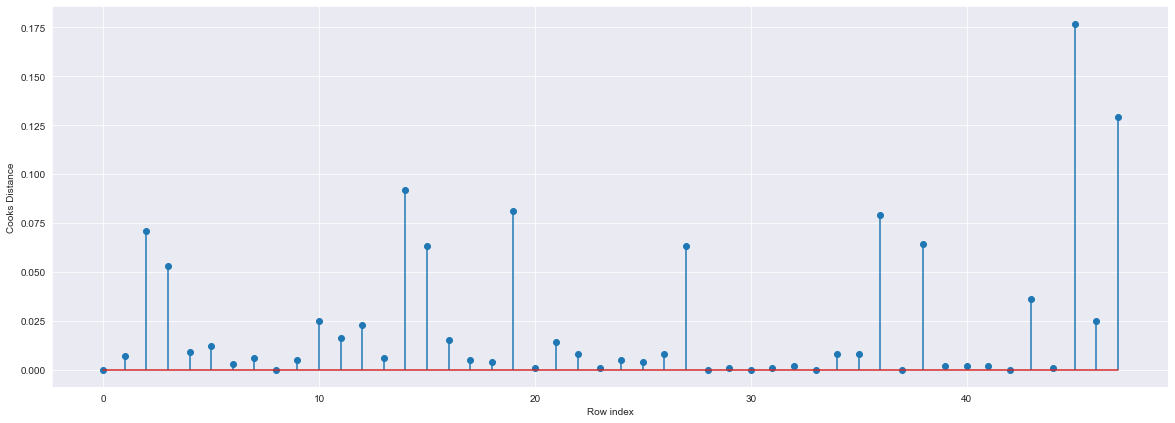

In [161]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data1)),np.round(c_M,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [162]:
(np.argmax(c_M),np.max(c_M))  

(45, 0.17722292337993012)

In [163]:
#Drop 76 and 77 observations
data2=data1.drop(data1.index[[45]],axis=0)

In [164]:
data2

RND  Administration  markspend       State     Profit
0   165349.20       136897.80  471784.10    New York  192261.83
1   162597.70       151377.59  443898.53  California  191792.06
2   153441.51       101145.55  407934.54     Florida  191050.39
3   144372.41       118671.85  383199.62    New York  182901.99
4   142107.34        91391.77  366168.42     Florida  166187.94
5   131876.90        99814.71  362861.36    New York  156991.12
6   134615.46       147198.87  127716.82  California  156122.51
7   130298.13       145530.06  323876.68     Florida  155752.60
8   120542.52       148718.95  311613.29    New York  152211.77
9   123334.88       108679.17  304981.62  California  149759.96
10  101913.08       110594.11  229160.95     Florida  146121.95
11  100671.96        91790.61  249744.55  California  144259.40
12   93863.75       127320.38  249839.44     Florida  141585.52
13   91992.39       135495.07  252664.93  California  134307.35
14  119943.24       156547.42  256512.92     Florida  132602.65
15  114523.61       122616.84  261776.23    New York  129917.04
16   78013.11       121597.55  264346.06  California  126992.93
17   94657.16       145077.58  282574.31    New York  125370.37
18   91749.16       114175.79  294919.57     Florida  124266.90
19   86419.70       153514.11       0.00    New York  122776.86
20   76253.86       113867.30  298664.47  California  118474.03
21   78389.47       153773.43  299737.29    New York  111313.02
22   73994.56       122782.75  303319.26     Florida  110352.25
23   67532.53       105751.03  304768.73     Florida  108733.99
24   77044.01        99281.34  140574.81    New York  108552.04
25   64664.71       139553.16  137962.62  California  107404.34
26   75328.87       144135.98  134050.07     Florida  105733.54
27   72107.60       127864.55  353183.81    New York  105008.31
28   66051.52       182645.56  118148.20     Florida  103282.38
29   65605.48       153032.06  107138.38    New York  101004.64
30   61994.48       115641.28   91131.24     Florida   99937.59
31   61136.38       152701.92   88218.23    New York   97483.56
32   63408.86       129219.61   46085.25  California   97427.84
33   55493.95       103057.49  214634.81     Florida   96778.92
34   46426.07       157693.92  210797.67  California   96712.80
35   46014.02        85047.44  205517.64    New York   96479.51
36   28663.76       127056.21  201126.82     Florida   90708.19
37   44069.95        51283.14  197029.42  California   89949.14
38   20229.59        65947.93  185265.10    New York   81229.06
39   38558.51        82982.09  174999.30  California   81005.76
40   28754.33       118546.05  172795.67  California   78239.91
41   27892.92        84710.77  164470.71     Florida   77798.83
42   23640.93        96189.63  148001.11  California   71498.49
43   15505.73       127382.30   35534.17    New York   69758.98
44   22177.74       154806.14   28334.72  California   65200.33
46       0.00       135426.92       0.00  California   42559.73
47     542.05        51743.15       0.00    New York   35673.41

In [86]:
#Reset the index and re arrange the row values
data3=data2.reset_index()

In [87]:
data4=data3.drop(['index'],axis=1)

In [88]:
data4

RND  Administration  markspend       State     Profit
0   165349.20       136897.80  471784.10    New York  192261.83
1   162597.70       151377.59  443898.53  California  191792.06
2   153441.51       101145.55  407934.54     Florida  191050.39
3   144372.41       118671.85  383199.62    New York  182901.99
4   142107.34        91391.77  366168.42     Florida  166187.94
5   131876.90        99814.71  362861.36    New York  156991.12
6   134615.46       147198.87  127716.82  California  156122.51
7   130298.13       145530.06  323876.68     Florida  155752.60
8   120542.52       148718.95  311613.29    New York  152211.77
9   123334.88       108679.17  304981.62  California  149759.96
10  101913.08       110594.11  229160.95     Florida  146121.95
11  100671.96        91790.61  249744.55  California  144259.40
12   93863.75       127320.38  249839.44     Florida  141585.52
13   91992.39       135495.07  252664.93  California  134307.35
14  119943.24       156547.42  256512.92     Florida  132602.65
15  114523.61       122616.84  261776.23    New York  129917.04
16   78013.11       121597.55  264346.06  California  126992.93
17   94657.16       145077.58  282574.31    New York  125370.37
18   91749.16       114175.79  294919.57     Florida  124266.90
19   86419.70       153514.11       0.00    New York  122776.86
20   76253.86       113867.30  298664.47  California  118474.03
21   78389.47       153773.43  299737.29    New York  111313.02
22   73994.56       122782.75  303319.26     Florida  110352.25
23   67532.53       105751.03  304768.73     Florida  108733.99
24   77044.01        99281.34  140574.81    New York  108552.04
25   64664.71       139553.16  137962.62  California  107404.34
26   75328.87       144135.98  134050.07     Florida  105733.54
27   72107.60       127864.55  353183.81    New York  105008.31
28   66051.52       182645.56  118148.20     Florida  103282.38
29   65605.48       153032.06  107138.38    New York  101004.64
30   61994.48       115641.28   91131.24     Florida   99937.59
31   61136.38       152701.92   88218.23    New York   97483.56
32   63408.86       129219.61   46085.25  California   97427.84
33   55493.95       103057.49  214634.81     Florida   96778.92
34   46426.07       157693.92  210797.67  California   96712.80
35   46014.02        85047.44  205517.64    New York   96479.51
36   28663.76       127056.21  201126.82     Florida   90708.19
37   44069.95        51283.14  197029.42  California   89949.14
38   20229.59        65947.93  185265.10    New York   81229.06
39   38558.51        82982.09  174999.30  California   81005.76
40   28754.33       118546.05  172795.67  California   78239.91
41   27892.92        84710.77  164470.71     Florida   77798.83
42   23640.93        96189.63  148001.11  California   71498.49
43   15505.73       127382.30   35534.17    New York   69758.98
44   22177.74       154806.14   28334.72  California   65200.33
45       0.00       135426.92       0.00  California   42559.73
46     542.05        51743.15       0.00    New York   35673.41

In [89]:
#Exclude variable "WT" and generate R-Squared and AIC values
final_ml_M= smf.ols('Profit~RND+Administration+markspend',data = data4).fit()

In [90]:
#Again check for influencers
model_influence_M = final_ml_M.get_influence()
(c_M, _) = model_influence_M.cooks_distance

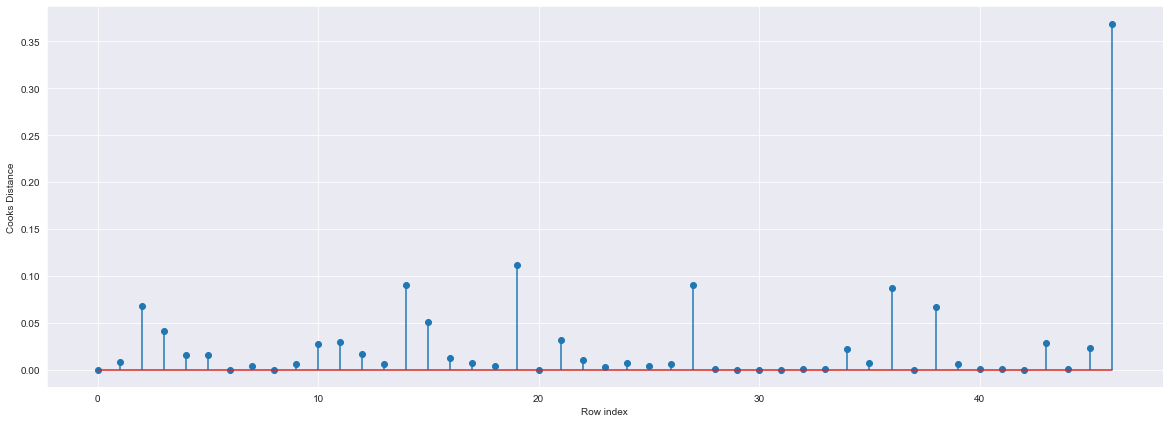

In [91]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data4)),np.round(c_M,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [92]:
#index of the data points where c is more than .5
(np.argmax(c_M),np.max(c_M))

(46, 0.3689969488012905)

In [93]:
#Exclude variable "WT" and generate R-Squared and AIC values
final_ml_M= smf.ols('Profit~RND+Administration+markspend',data = data4).fit()

In [94]:
(final_ml_M.rsquared,final_ml_M.aic)

(0.962209861743638, 975.2560788434844)

In [165]:
#New data for prediction
new_data=pd.DataFrame({"RND":1200,"Administration":50000,"markspend":50},index=[1])

In [171]:
final_ml_M.predict(new_data)

1    49276.934942
dtype: float64

In [167]:
final_ml_M.predict(data_new.iloc[0:5,])

0    191971.871759
1    188967.782581
2    180712.567268
3    172869.490807
4    170578.036950
dtype: float64

In [168]:
final_ml_M.predict(data_new.iloc[0:7,])

0    191971.871759
1    188967.782581
2    180712.567268
3    172869.490807
4    170578.036950
5    162484.310539
6    157418.056567
dtype: float64

In [169]:
pred_y = final_ml_M.predict(data_new)

In [170]:
pred_y

0     191971.871759
1     188967.782581
2     180712.567268
3     172869.490807
4     170578.036950
5     162484.310539
6     157418.056567
7     160056.281416
8     152059.053474
9     154037.325613
10    134978.418179
11    134639.569931
12    129323.660565
13    127948.270865
14    149902.391489
15    145829.670351
16    117385.111199
17    130946.620632
18    129053.092322
19    115852.080349
20    117062.367610
21    118763.657773
22    115439.961955
23    110436.010223
24    112835.198011
25    103083.998748
26    111295.326674
27    115493.839071
28    103560.235809
29    102874.391026
30     99562.829573
31     98803.185556
32     99287.414898
33     98268.997923
34     91067.261314
35     90583.553097
36     76894.358164
37     88804.665028
38     69819.220019
39     83823.845068
40     76096.941468
41     75168.869015
42     71342.371731
43     61540.451587
44     66532.246145
45     49177.678875
46     58470.311146
47     48337.919834
48     48761.388681
49     49722.192655
